In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
import os
from astropy.visualization import time_support
import pandas as pd

#UVOT band: U

#add TESS :) 
#all curves extracted using XSELECT, GTI files by MAKETIME, COORDINATOR adjusted
#not barrycor yet
#make dataframe of uvot and xrt counts/times

In [2]:
#open TESS data

TESSDATA = '/Users/katborski/Documents/GitHub/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits'

with fits.open(TESSDATA, mode="readonly") as hdulist:
    raw_time = hdulist[1].data['TIME']
    raw_flux = hdulist[1].data['PDCSAP_FLUX']
    raw_err = hdulist[1].data['PDCSAP_FLUX_ERR']
    
#Remove nan values, correct time values
    
data = np.vstack((raw_time, raw_flux, raw_err))
nonan_data = data[:, ~np.isnan(data).any(axis=0)]

times = nonan_data[0]
flux = nonan_data[1]
error = nonan_data[2]
tesstime=Time(times+2457000,format='jd',scale='utc')
#tesstime.mjd

## Curve ID: 00014769001

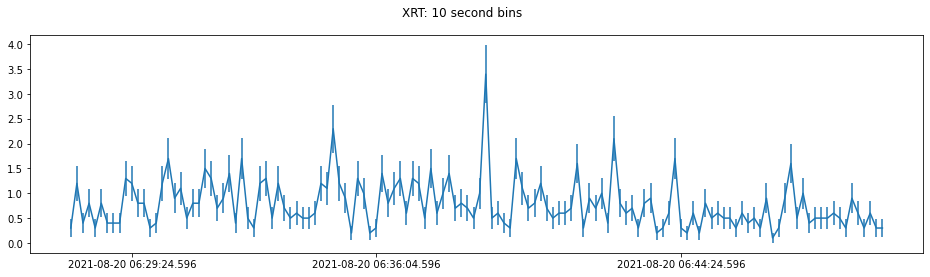

([<matplotlib.axis.XTick at 0x16161ae20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

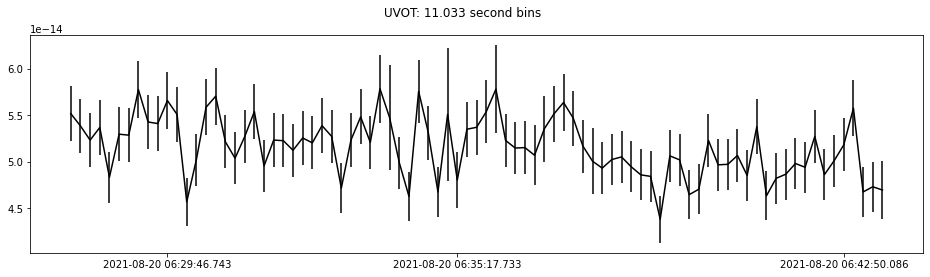

In [16]:
#XRT

lc_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/001_curve_b.lc')

#time correction
xrt1=np.arange(lc_data[1].header['TSTART'],lc_data[1].header['TSTOP']-10,10)/86400
xlis=[]
for i in xrt1: 
    x = i + lc_data[0].header['MJDREFI']+lc_data[0].header['MJDREFF']
    xlis.append(x)
xrt1=np.array(xlis)
xrt1c = Time(xlis, format='mjd',scale = 'utc')
xrt1= xrt1c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt1,lc_data[1].data['RATE'],xerr=None,yerr=lc_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt1_time = xrt1
pt1_rate = lc_data[1].data['RATE']

#UVOT
uvot1 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/001_evtlc.lc')

t=uvot1[1].data['TIME']/86400
lis=[]
for i in t: 
    x = i + uvot1[0].header['MJDREFI']+uvot1[0].header['MJDREFF']
    lis.append(x)
t1=np.array(lis)
t1c = Time(lis, format='mjd',scale = 'utc')
t1= t1c.iso

uv1_time= t1
uv1_rate= uvot1[1].data['CORR_RATE']*8.446e-16 #ergs/cm/s
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv1_time,uv1_rate,xerr=None,yerr=uvot1[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))



In [49]:
#uvot1[0].header


## Curve ID: 00014769002

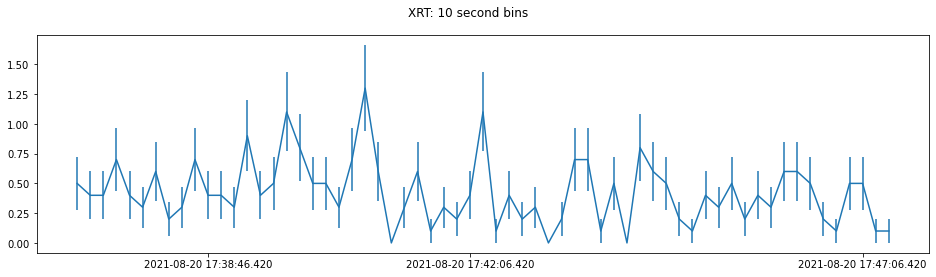

([<matplotlib.axis.XTick at 0x1616dc940>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

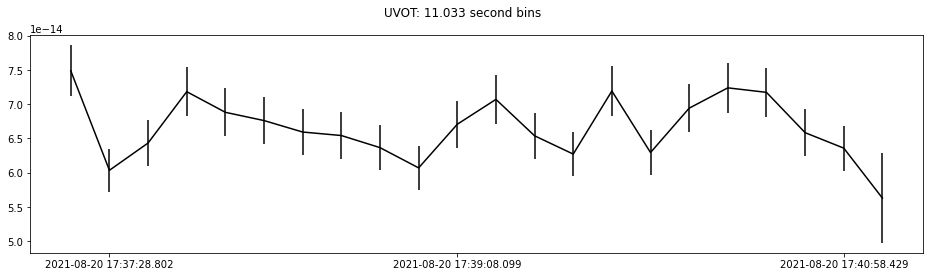

In [18]:
#XRT:
    
lc2_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/002_curve_b.lc')

#time correction
xrt2=np.arange(lc2_data[1].header['TSTART'],lc2_data[1].header['TSTOP']-10,10)/86400
xlis2=[]
for i in xrt2: 
    x = i + lc2_data[0].header['MJDREFI']+lc2_data[0].header['MJDREFF']
    xlis2.append(x)
xrt2=np.array(xlis2)
xrt2c = Time(xlis2, format='mjd',scale = 'utc')
xrt2= xrt2c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt2,lc2_data[1].data['RATE'],xerr=None,yerr=lc2_data[1].data['ERROR'])
plt.xticks(ticks=(10,30,60))
plt.show()
pt2_time = xrt2
pt2_rate = lc2_data[1].data['RATE']


#UVOT

uvot2 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/002_evtlc.lc')
t=uvot2[1].data['TIME']/86400
lis=[]
for i in t: 
    x = i + uvot2[0].header['MJDREFI']+uvot2[0].header['MJDREFF']
    lis.append(x)
t2=np.array(lis)
t2c = Time(lis, format='mjd',scale = 'utc')
t2= t2c.iso

uv2_time= t2
uv2_rate= uvot2[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv2_time,uv2_rate,xerr=None,yerr=uvot2[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(1,10,20))

In [50]:
#uvot2[1].header

## Curve ID: 00014769003 

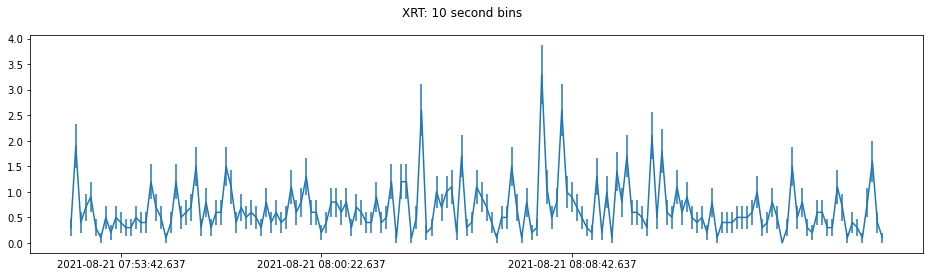

In [51]:
#XRT

lc3_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/003_curve_b.lc')

#time correction
xrt3=np.arange(lc3_data[1].header['TSTART'],lc3_data[1].header['TSTOP']-10,10)/86400
xlis3=[]
for i in xrt3: 
    x = i + lc3_data[0].header['MJDREFI']+lc3_data[0].header['MJDREFF']
    xlis3.append(x)
xrt3=np.array(xlis3)
xrt3c = Time(xlis3, format='mjd',scale = 'utc')
xrt3= xrt3c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt3,lc3_data[1].data['RATE'],xerr=None,yerr=lc3_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt3_time = xrt3
pt3_rate = lc3_data[1].data['RATE']


#UVOT: no data

### Curve ID:00014769004

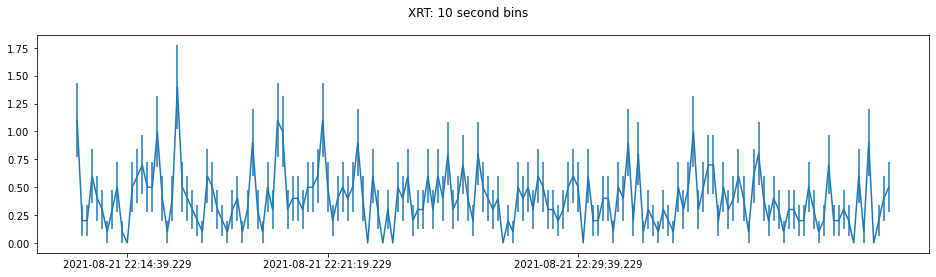

([<matplotlib.axis.XTick at 0x1618aa1f0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

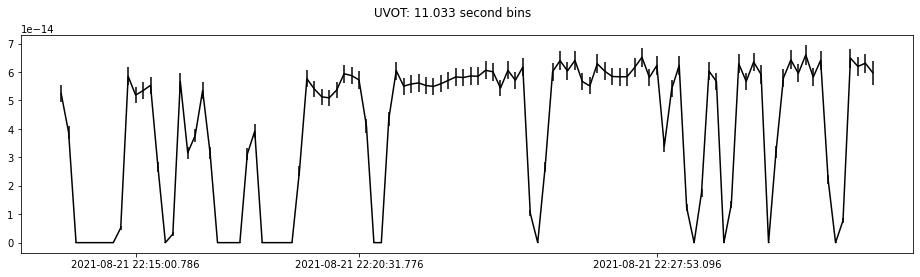

In [19]:
#XRT

lc4_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/004_curve_b.lc')

#time correction
xrt4=np.arange(lc4_data[1].header['TSTART'],lc4_data[1].header['TSTOP']-10,10)/86400
xlis4=[]
for i in xrt4: 
    x = i + lc4_data[0].header['MJDREFI']+lc4_data[0].header['MJDREFF']
    xlis4.append(x)
xrt4=np.array(xlis4)
xrt4c = Time(xlis4, format='mjd',scale = 'utc')
xrt4= xrt4c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt4,lc4_data[1].data['RATE'],xerr=None,yerr=lc4_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt4_time = xrt4
pt4_rate = lc4_data[1].data['RATE']

#UVOT

uvot4 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/004_evtlc.lc')
t=uvot4[1].data['TIME']/86400
lis=[]
for i in t: 
    x = i + uvot4[0].header['MJDREFI']+uvot4[0].header['MJDREFF']
    lis.append(x)
t4=np.array(lis)
t4c = Time(lis, format='mjd',scale = 'utc')
t4= t4c.iso

uv4_time= t4
uv4_rate= uvot4[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv4_time,uv4_rate,xerr=None,yerr=uvot4[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))

## Curve ID: 00014769005 

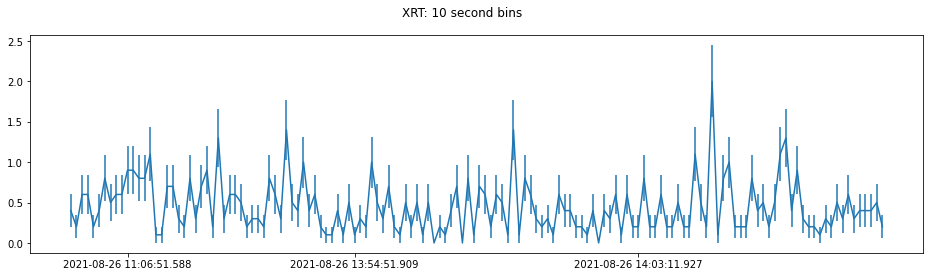

([<matplotlib.axis.XTick at 0x161969820>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

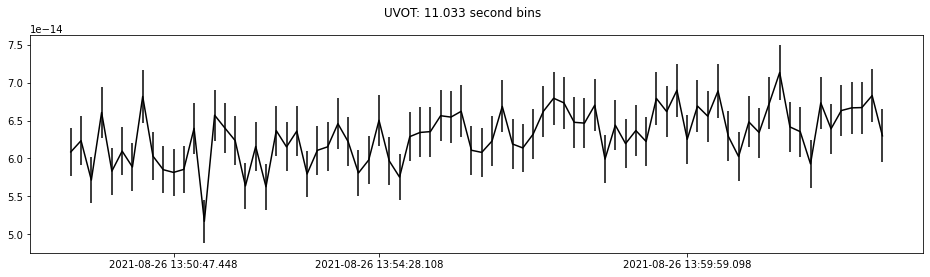

In [20]:
lc5_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/005_curve_b.lc')

#time correction
xrt5=lc5_data[1].data['TIME']/86400
xlis5=[]
for i in xrt5: 
    x = i + lc5_data[0].header['MJDREFI']+lc5_data[0].header['MJDREFF']
    xlis5.append(x)
xrt5=np.array(xlis5)
xrt5c = Time(xlis5, format='mjd',scale = 'utc')
xrt5= xrt5c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt5,lc5_data[1].data['RATE'],xerr=None,yerr=lc5_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt5_time = xrt5
pt5_rate = lc5_data[1].data['RATE']

#UVOT

uvot5 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/005_evtlc.lc')
t=uvot5[1].data['TIME']/86400
lis5=[]
for i in t: 
    x = i + uvot5[0].header['MJDREFI']+uvot5[0].header['MJDREFF']
    lis5.append(x)
t5=np.array(lis5)
t5c = Time(lis5, format='mjd',scale = 'utc')
t5= t5c.iso

uv5_time= t5
uv5_rate= uvot5[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv5_time,uv5_rate,xerr=None,yerr=uvot5[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,30,60))

#Missing data :( 

## Curve ID: 00014769006

([<matplotlib.axis.XTick at 0x161b9a610>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

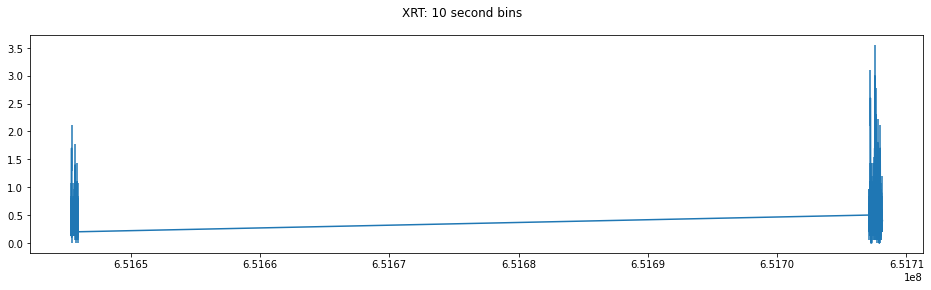

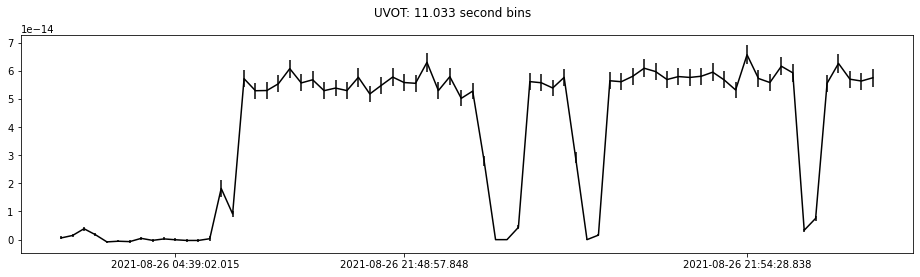

In [21]:
#XRT

lc6 = '/Users/katborski/Documents/GitHub/xrt-10sec/006_curve_b.lc'
lc6_data = fits.open(lc6)
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(lc6_data[1].data['TIME'],lc6_data[1].data['RATE'],xerr=None,yerr=lc6_data[1].data['ERROR'])
pt6_time = lc6_data[1].data['TIME']
pt6_rate = lc6_data[1].data['RATE']

#UVOT

uvot6 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/006_evtlc.lc')
t=uvot6[1].data['TIME']/86400
lis6=[]
for i in t: 
    x = i + uvot6[0].header['MJDREFI']+uvot6[0].header['MJDREFF']
    lis6.append(x)
t6=np.array(lis6)
t6c = Time(lis6, format='mjd',scale = 'utc')
t6= t6c.iso

uv6_time= t6
uv6_rate= uvot6[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv6_time,uv6_rate,xerr=None,yerr=uvot6[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,30,60))
#Missing data :( 

## Curve ID: 00014769007 

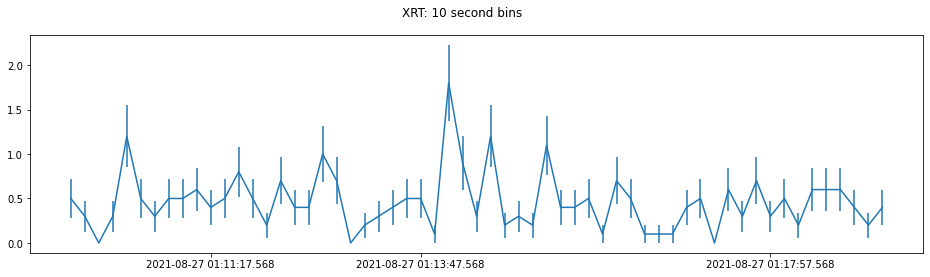

([<matplotlib.axis.XTick at 0x161dda8b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

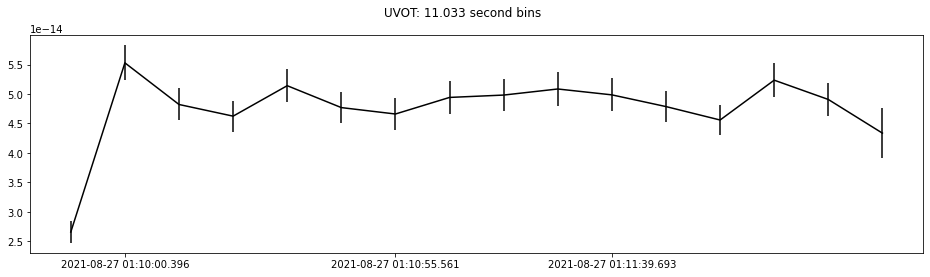

In [22]:
#XRT

lc7_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/007_curve_b.lc')

#time correction
xrt7=np.arange(lc7_data[1].header['TSTART'],lc7_data[1].header['TSTOP']-10,10)/86400
xlis7=[]
for i in xrt7: 
    x = i + lc7_data[0].header['MJDREFI']+lc7_data[0].header['MJDREFF']
    xlis7.append(x)
xrt7=np.array(xlis7)
xrt7c = Time(xlis7, format='mjd',scale = 'utc')
xrt7= xrt7c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt7,lc7_data[1].data['RATE'],xerr=None,yerr=lc7_data[1].data['ERROR'])
plt.xticks(ticks=(10,25,50))
plt.show()
pt7_time = xrt7
pt7_rate = lc7_data[1].data['RATE']

#UVOT

uvot7 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/007_evtlc.lc')
t=uvot7[1].data['TIME']/86400
lis7=[]
for i in t: 
    x = i + uvot7[0].header['MJDREFI']+uvot7[0].header['MJDREFF']
    lis7.append(x)
t7=np.array(lis7)
t7c = Time(lis7, format='mjd',scale = 'utc')
t7= t7c.iso

uv7_time= t7
uv7_rate= uvot7[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv7_time,uv7_rate,xerr=None,yerr=uvot7[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(1,6,10))

## Curve ID: 00014769008

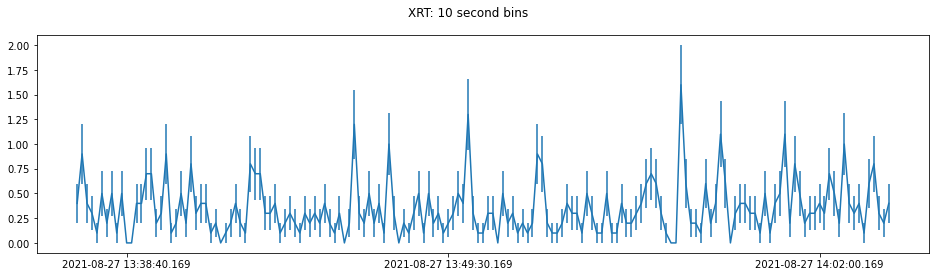

([<matplotlib.axis.XTick at 0x161fa5100>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

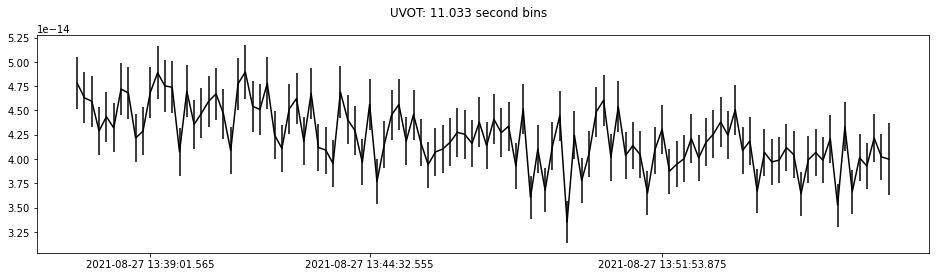

In [23]:
#XRT


lc8_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/008_curve_b.lc')

#time correction
xrt8=np.arange(lc8_data[1].header['TSTART'],lc8_data[1].header['TSTOP']-10,10)/86400
xlis8=[]
for i in xrt8: 
    x = i + lc8_data[0].header['MJDREFI']+lc8_data[0].header['MJDREFF']
    xlis8.append(x)
xrt8=np.array(xlis8)
xrt8c = Time(xlis8, format='mjd',scale = 'utc')
xrt8= xrt8c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt8,lc8_data[1].data['RATE'],xerr=None,yerr=lc8_data[1].data['ERROR'])
plt.xticks(ticks=(10,75,150))
plt.show()
pt8_time = xrt8
pt8_rate = lc8_data[1].data['RATE']


#UVOT

uvot8 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/008_evtlc.lc')
t=uvot8[1].data['TIME']/86400
lis8=[]
for i in t: 
    x = i + uvot8[0].header['MJDREFI']+uvot8[0].header['MJDREFF']
    lis8.append(x)
t8=np.array(lis8)
t8c = Time(lis8, format='mjd',scale = 'utc')
t8= t8c.iso

uv8_time= t8
uv8_rate= uvot8[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv8_time,uv8_rate,xerr=None,yerr=uvot8[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))

lc815 = '/Users/katborski/Documents/GitHub/XRT_lc/swWT815.lc'
lc815_data = fits.getdata(lc815)
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 12 second bins")
plt.errorbar(lc815_data['TIME'],lc815_data['RATE'],xerr=None,yerr=lc815_data['ERROR'])


## Curve ID: 00014769009

([<matplotlib.axis.XTick at 0x161f17b80>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

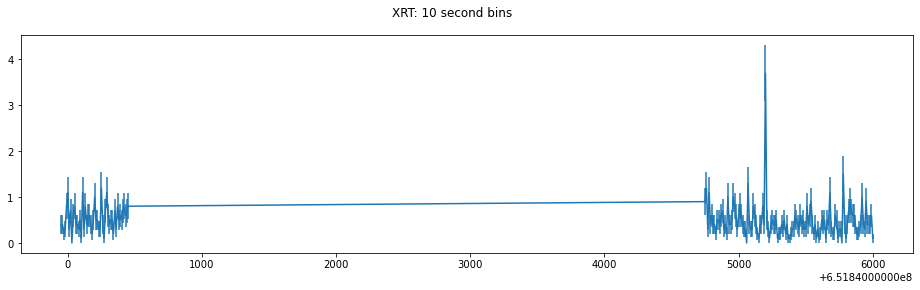

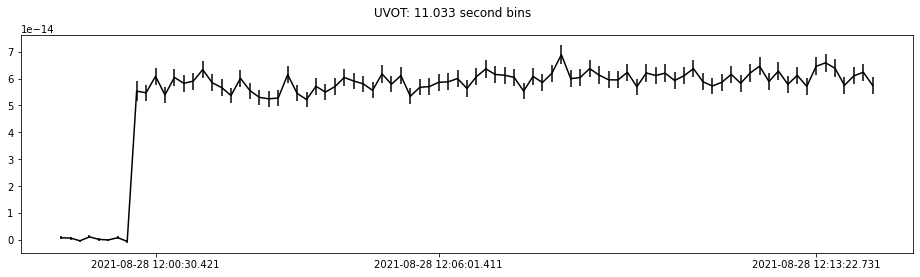

In [24]:
#XRT

lc9 = '/Users/katborski/Documents/GitHub/xrt-10sec/009_curve_b.lc'
lc9_data = fits.open(lc9)
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(lc9_data[1].data['TIME'],lc9_data[1].data['RATE'],xerr=None,yerr=lc9_data[1].data['ERROR'])
pt9_time = lc9_data[1].data['TIME']
pt9_rate = lc9_data[1].data['RATE']

#UVOT

uvot9 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/009_evtlc.lc')
t=uvot9[1].data['TIME']/86400
lis9=[]
for i in t: 
    x = i + uvot9[0].header['MJDREFI']+uvot9[0].header['MJDREFF']
    lis9.append(x)
t9=np.array(lis9)
t9c = Time(lis9, format='mjd',scale = 'utc')
t9= t9c.iso

uv9_time= t9
uv9_rate= uvot9[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv9_time,uv9_rate,xerr=None,yerr=uvot9[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))

## Curve ID: 00014769010

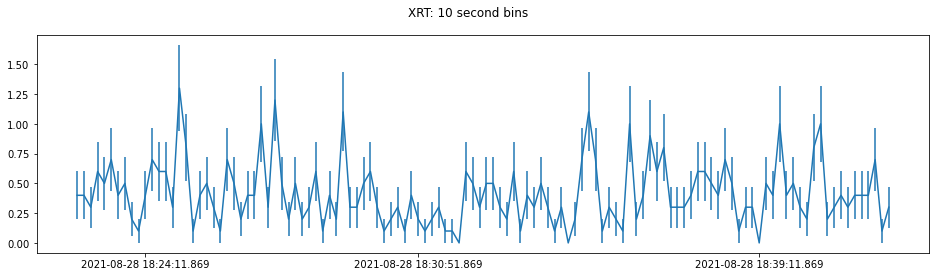

([<matplotlib.axis.XTick at 0x161eb34c0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

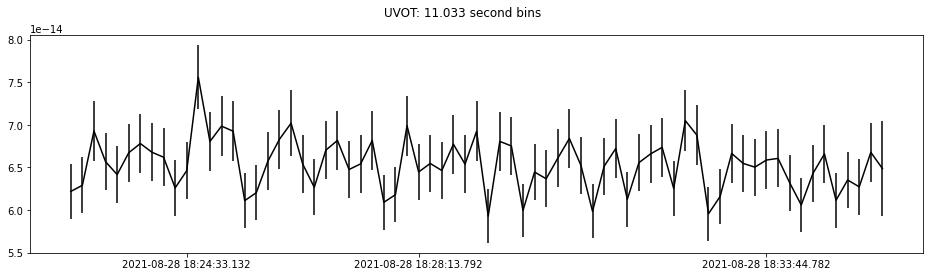

In [25]:
#XRT

lc10_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/010_curve_b.lc')

#time correction
xrt10=np.arange(lc10_data[1].header['TSTART'],lc10_data[1].header['TSTOP']-10,10)/86400
xlis10=[]
for i in xrt10: 
    x = i + lc10_data[0].header['MJDREFI']+lc10_data[0].header['MJDREFF']
    xlis10.append(x)
xrt10=np.array(xlis10)
xrt10c = Time(xlis10, format='mjd',scale = 'utc')
xrt10= xrt10c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt10,lc10_data[1].data['RATE'],xerr=None,yerr=lc10_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt10_time = xrt10
pt10_rate = lc10_data[1].data['RATE']


#UVOT

uvot10 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/010_evtlc.lc')
t=uvot10[1].data['TIME']/86400
lis10=[]
for i in t: 
    x = i + uvot10[0].header['MJDREFI']+uvot10[0].header['MJDREFF']
    lis10.append(x)
t10=np.array(lis10)
t10c = Time(lis10, format='mjd',scale = 'utc')
t10= t10c.iso

uv10_time= t10
uv10_rate= uvot10[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv10_time,uv10_rate,xerr=None,yerr=uvot10[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,30,60))

## Curve ID: 00014769011

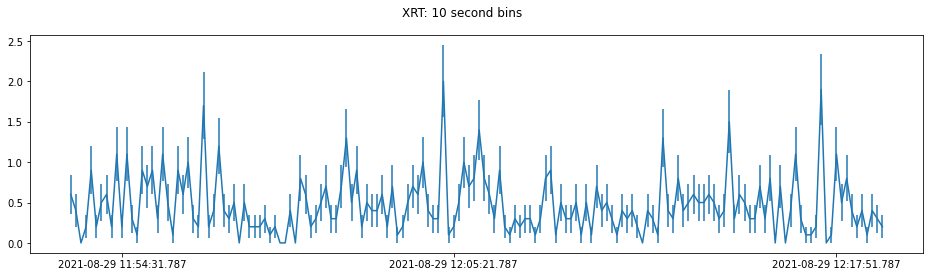

([<matplotlib.axis.XTick at 0x16237f370>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

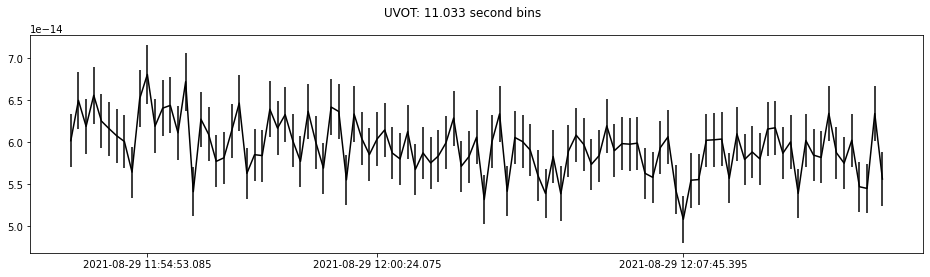

In [26]:
#XRT

lc11_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/011_curve_b.lc')

#time correction
xrt11=np.arange(lc11_data[1].header['TSTART'],lc11_data[1].header['TSTOP']-10,10)/86400
xlis11=[]
for i in xrt11: 
    x = i + lc11_data[0].header['MJDREFI']+lc11_data[0].header['MJDREFF']
    xlis11.append(x)
xrt11=np.array(xlis11)
xrt11c = Time(xlis11, format='mjd',scale = 'utc')
xrt11= xrt11c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt11,lc11_data[1].data['RATE'],xerr=None,yerr=lc11_data[1].data['ERROR'])
plt.xticks(ticks=(10,75,150))
plt.show()
pt11_time = xrt11
pt11_rate = lc11_data[1].data['RATE']


#UVOT

uvot11 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/011_evtlc.lc')
t=uvot11[1].data['TIME']/86400
lis11=[]
for i in t: 
    x = i + uvot11[0].header['MJDREFI']+uvot11[0].header['MJDREFF']
    lis11.append(x)
t11=np.array(lis11)
t11c = Time(lis11, format='mjd',scale = 'utc')
t11= t11c.iso

uv11_time= t11
uv11_rate= uvot11[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv11_time,uv11_rate,xerr=None,yerr=uvot11[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))

## Curve ID: 00014769012

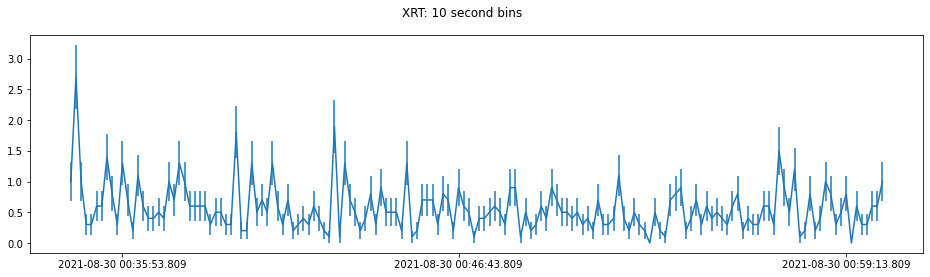

([<matplotlib.axis.XTick at 0x16258cd60>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

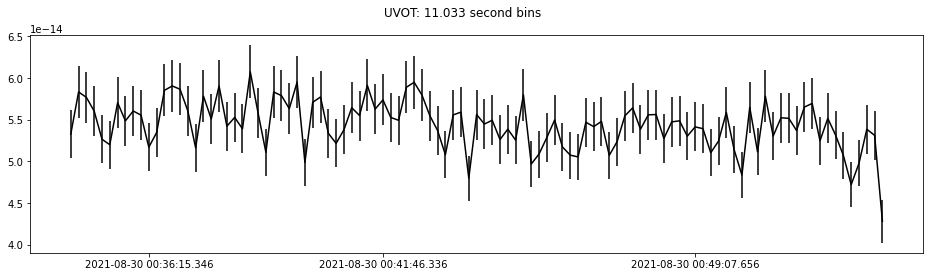

In [27]:
#XRT

lc12_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/012_curve_b.lc')

#time correction
xrt12=np.arange(lc12_data[1].header['TSTART'],lc12_data[1].header['TSTOP']-10,10)/86400
xlis12=[]
for i in xrt12: 
    x = i + lc12_data[0].header['MJDREFI']+lc12_data[0].header['MJDREFF']
    xlis12.append(x)
xrt12=np.array(xlis12)
xrt12c = Time(xlis12, format='mjd',scale = 'utc')
xrt12= xrt12c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt12,lc12_data[1].data['RATE'],xerr=None,yerr=lc12_data[1].data['ERROR'])
plt.xticks(ticks=(10,75,150))
plt.show()
pt12_time = xrt12
pt12_rate = lc12_data[1].data['RATE']


#UVOT
uvot12 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/012_evtlc.lc')
t=uvot12[1].data['TIME']/86400
lis12=[]
for i in t: 
    x = i + uvot12[0].header['MJDREFI']+uvot12[0].header['MJDREFF']
    lis12.append(x)
t12=np.array(lis12)
t12c = Time(lis12, format='mjd',scale = 'utc')
t12= t12c.iso

uv12_time= t12
uv12_rate= uvot12[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv12_time,uv12_rate,xerr=None,yerr=uvot12[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))

## Curve ID: 00014769013

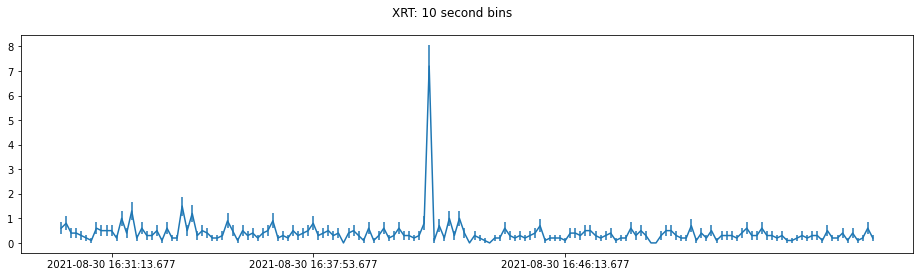

([<matplotlib.axis.XTick at 0x1627e8a90>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

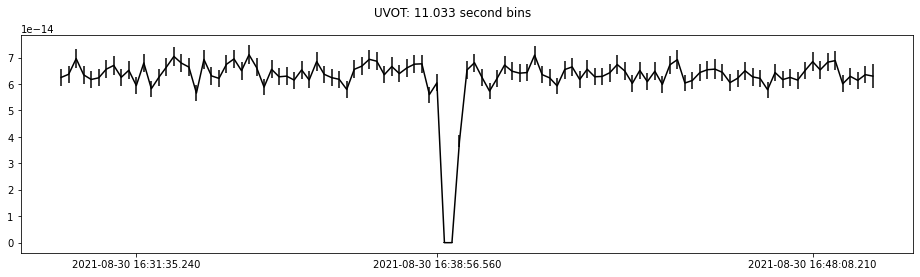

In [28]:
#XRT

lc13_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/013_curve_b.lc')

#time correction
xrt13=np.arange(lc13_data[1].header['TSTART'],lc13_data[1].header['TSTOP']-10,10)/86400
xlis13=[]
for i in xrt13: 
    x = i + lc13_data[0].header['MJDREFI']+lc13_data[0].header['MJDREFF']
    xlis13.append(x)
xrt13=np.array(xlis13)
xrt13c = Time(xlis13, format='mjd',scale = 'utc')
xrt13= xrt13c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt13,lc13_data[1].data['RATE'],xerr=None,yerr=lc13_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt13_time = xrt13
pt13_rate = lc13_data[1].data['RATE']

#UVOT

uvot13 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/013_evtlc.lc')
t=uvot13[1].data['TIME']/86400
lis13=[]
for i in t: 
    x = i + uvot13[0].header['MJDREFI']+uvot13[0].header['MJDREFF']
    lis13.append(x)
t13=np.array(lis13)
t13c = Time(lis13, format='mjd',scale = 'utc')
t13= t13c.iso

uv13_time= t13
uv13_rate= uvot13[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv13_time,uv13_rate,xerr=None,yerr=uvot13[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,50,100))

## Curve ID: 00014769014

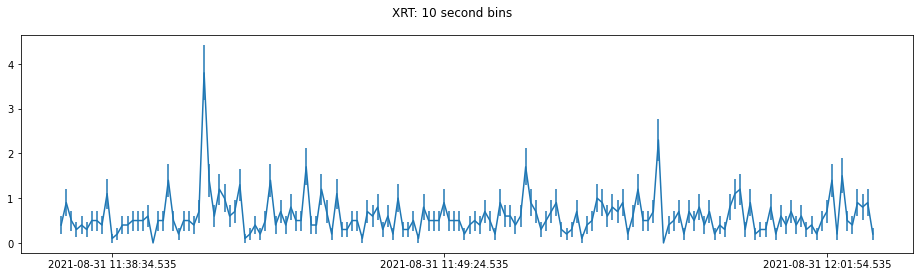

([<matplotlib.axis.XTick at 0x162aaf160>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

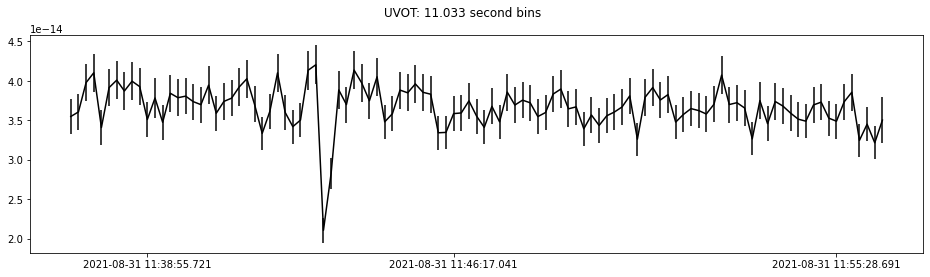

In [29]:
#XRT
lc14_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/014_curve_b.lc')

#time correction
xrt14=np.arange(lc14_data[1].header['TSTART'],lc14_data[1].header['TSTOP']-10,10)/86400
xlis14=[]
for i in xrt14: 
    x = i + lc14_data[0].header['MJDREFI']+lc14_data[0].header['MJDREFF']
    xlis14.append(x)
xrt14=np.array(xlis14)
xrt14c = Time(xlis14, format='mjd',scale = 'utc')
xrt14= xrt14c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt14,lc14_data[1].data['RATE'],xerr=None,yerr=lc14_data[1].data['ERROR'])
plt.xticks(ticks=(10,75,150))
plt.show()
pt14_time = xrt14
pt14_rate = lc14_data[1].data['RATE']


#UVOT
uvot14 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/014_evtlc.lc')
t=uvot14[1].data['TIME']/86400
lis14=[]
for i in t: 
    x = i + uvot14[0].header['MJDREFI']+uvot14[0].header['MJDREFF']
    lis14.append(x)
t14=np.array(lis14)
t14c = Time(lis14, format='mjd',scale = 'utc')
t14= t14c.iso

uv14_time= t14
uv14_rate= uvot14[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv14_time,uv14_rate,xerr=None,yerr=uvot14[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,50,100))

## Curve ID: 00014769015

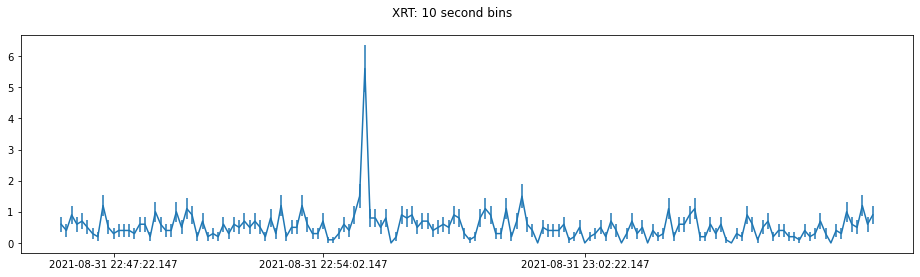

([<matplotlib.axis.XTick at 0x162cdd340>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

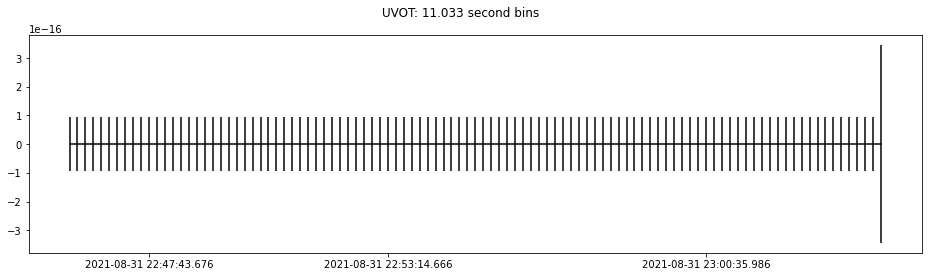

In [30]:
#XRT

lc15_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/015_curve_b.lc')

#time correction
xrt15=np.arange(lc15_data[1].header['TSTART'],lc15_data[1].header['TSTOP']-10,10)/86400
xlis15=[]
for i in xrt15: 
    x = i + lc15_data[0].header['MJDREFI']+lc15_data[0].header['MJDREFF']
    xlis15.append(x)
xrt15=np.array(xlis15)
xrt15c = Time(xlis15, format='mjd',scale = 'utc')
xrt15= xrt15c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt15,lc15_data[1].data['RATE'],xerr=None,yerr=lc15_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt15_time = xrt15
pt15_rate = lc15_data[1].data['RATE']

#UVOT

uvot15 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/015_evtlc.lc')
t=uvot15[1].data['TIME']/86400
lis15=[]
for i in t: 
    x = i + uvot15[0].header['MJDREFI']+uvot15[0].header['MJDREFF']
    lis15.append(x)
t15=np.array(lis15)
t15c = Time(lis15, format='mjd',scale = 'utc')
t15= t15c.iso

uv15_time= t15
uv15_rate= uvot15[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv15_time,uv15_rate,xerr=None,yerr=uvot15[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))

## Curve ID: 00014769016

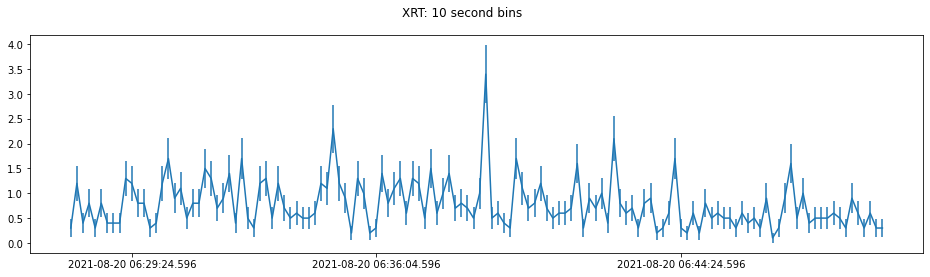

([<matplotlib.axis.XTick at 0x162dc8400>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

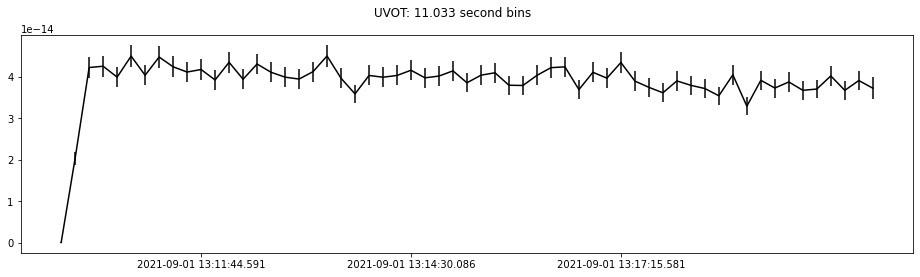

In [31]:
#XRT

lc16_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/016_curve_b.lc')

#time correction
xrt16=np.arange(lc16_data[1].header['TSTART'],lc16_data[1].header['TSTOP']-10,10)/86400
xlis16=[]
for i in xrt16: 
    x = i + lc16_data[0].header['MJDREFI']+lc16_data[0].header['MJDREFF']
    xlis16.append(x)
xrt16=np.array(xlis16)
xrt16c = Time(xlis16, format='mjd',scale = 'utc')
xrt16= xrt16c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt1,lc_data[1].data['RATE'],xerr=None,yerr=lc_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt16_time = xrt16
pt16_rate = lc16_data[1].data['RATE']


#UVOT

uvot16 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/016_evtlc.lc')
t=uvot16[1].data['TIME']/86400
lis16=[]
for i in t: 
    x = i + uvot16[0].header['MJDREFI']+uvot16[0].header['MJDREFF']
    lis16.append(x)
t16=np.array(lis16)
t16c = Time(lis16, format='mjd',scale = 'utc')
t16= t16c.iso

uv16_time= t16
uv16_rate= uvot16[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv16_time,uv16_rate,xerr=None,yerr=uvot16[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,25,40))

## Curve ID: 00014769017

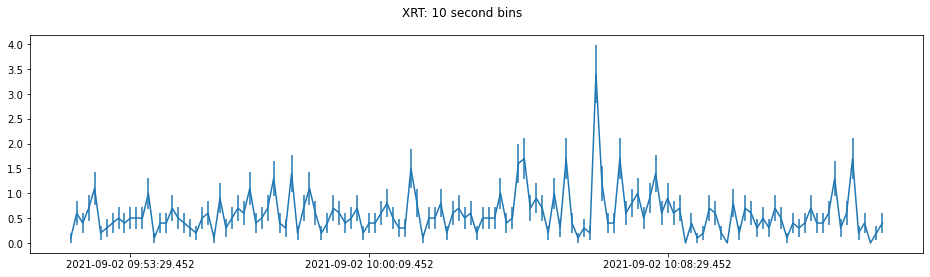

([<matplotlib.axis.XTick at 0x1626f4d00>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

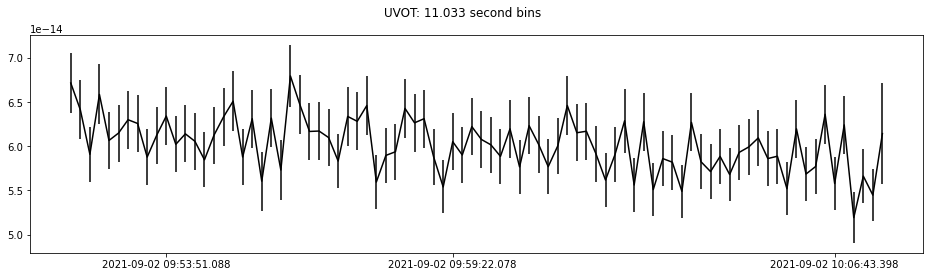

In [32]:
#XRT

lc17_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/017_curve_b.lc')

#time correction
xrt17=np.arange(lc17_data[1].header['TSTART'],lc17_data[1].header['TSTOP']-10,10)/86400
xlis17=[]
for i in xrt17: 
    x = i + lc17_data[0].header['MJDREFI']+lc17_data[0].header['MJDREFF']
    xlis17.append(x)
xrt17=np.array(xlis17)
xrt17c = Time(xlis17, format='mjd',scale = 'utc')
xrt17= xrt17c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt17,lc17_data[1].data['RATE'],xerr=None,yerr=lc17_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt17_time = xrt17
pt17_rate = lc17_data[1].data['RATE']

#UVOT

uvot17 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/017_evtlc.lc')
t=uvot17[1].data['TIME']/86400
lis17=[]
for i in t: 
    x = i + uvot17[0].header['MJDREFI']+uvot17[0].header['MJDREFF']
    lis17.append(x)
t17=np.array(lis17)
t17c = Time(lis17, format='mjd',scale = 'utc')
t17= t17c.iso

uv17_time= t17
uv17_rate= uvot17[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv17_time,uv17_rate,xerr=None,yerr=uvot17[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))

## Curve ID: 00014769018

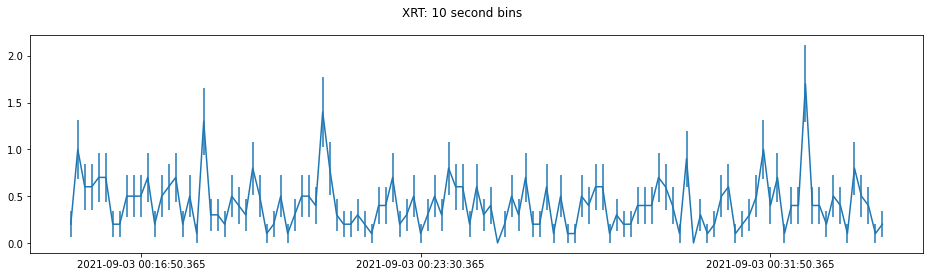

([<matplotlib.axis.XTick at 0x16298b880>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

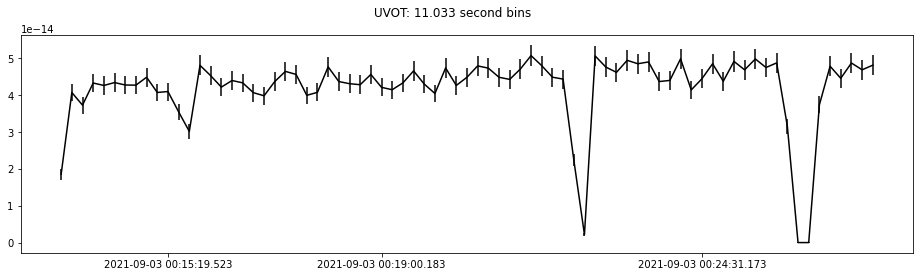

In [33]:
#XRT

lc18_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/018_curve_b.lc')

#time correction
xrt18=np.arange(lc18_data[1].header['TSTART'],lc18_data[1].header['TSTOP']-10,10)/86400
xlis18=[]
for i in xrt18: 
    x = i + lc18_data[0].header['MJDREFI']+lc18_data[0].header['MJDREFF']
    xlis18.append(x)
xrt18=np.array(xlis18)
xrt18c = Time(xlis18, format='mjd',scale = 'utc')
xrt18= xrt18c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt18,lc18_data[1].data['RATE'],xerr=None,yerr=lc18_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt18_time = xrt18
pt18_rate = lc18_data[1].data['RATE']

#UVOT

uvot18 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/018_evtlc.lc')
t=uvot18[1].data['TIME']/86400
lis18=[]
for i in t: 
    x = i + uvot18[0].header['MJDREFI']+uvot18[0].header['MJDREFF']
    lis18.append(x)
t18=np.array(lis18)
t18c = Time(lis18, format='mjd',scale = 'utc')
t18= t18c.iso

uv18_time= t18
uv18_rate= uvot18[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv18_time,uv18_rate,xerr=None,yerr=uvot18[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,30,60))

## Curve ID: 00014769019

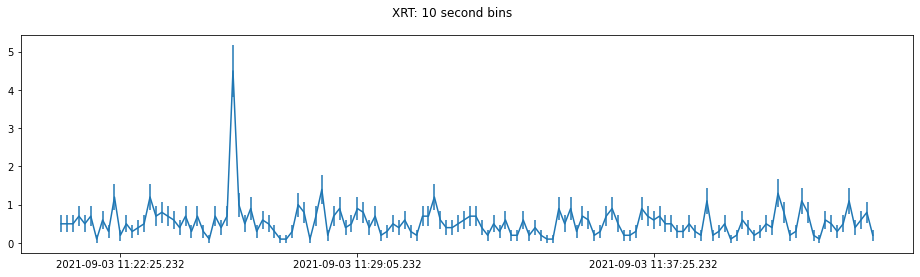

([<matplotlib.axis.XTick at 0x16304f310>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

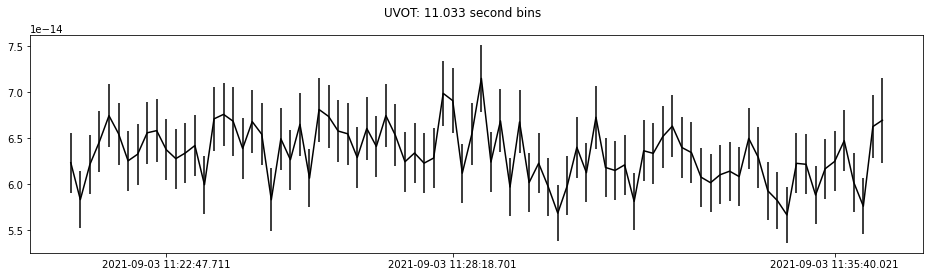

In [34]:
#XRT
lc19_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/019_curve_b.lc')

#time correction
xrt19=np.arange(lc19_data[1].header['TSTART'],lc19_data[1].header['TSTOP']-10,10)/86400
xlis19=[]
for i in xrt19: 
    x = i + lc19_data[0].header['MJDREFI']+lc19_data[0].header['MJDREFF']
    xlis19.append(x)
xrt19=np.array(xlis19)
xrt19c = Time(xlis19, format='mjd',scale = 'utc')
xrt19= xrt19c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt19,lc19_data[1].data['RATE'],xerr=None,yerr=lc19_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt19_time = xrt19
pt19_rate = lc19_data[1].data['RATE']


#UVOT

uvot19 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/019_evtlc.lc')
t=uvot19[1].data['TIME']/86400
lis19=[]
for i in t: 
    x = i + uvot19[0].header['MJDREFI']+uvot19[0].header['MJDREFF']
    lis19.append(x)
t19=np.array(lis19)
t19c = Time(lis19, format='mjd',scale = 'utc')
t19= t19c.iso

uv19_time= t19
uv19_rate= uvot19[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv19_time,uv19_rate,xerr=None,yerr=uvot19[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))

## Curve ID: 00014769020

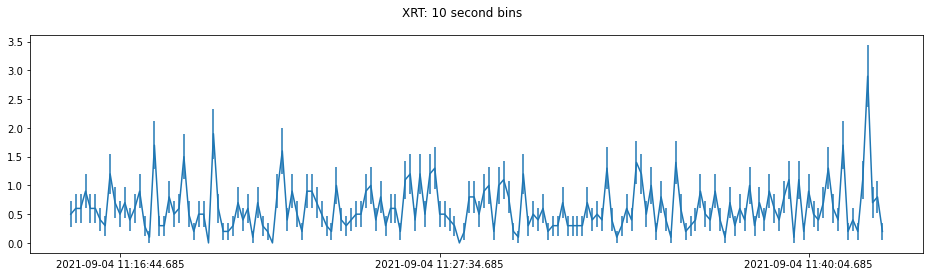

([<matplotlib.axis.XTick at 0x1632ec910>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

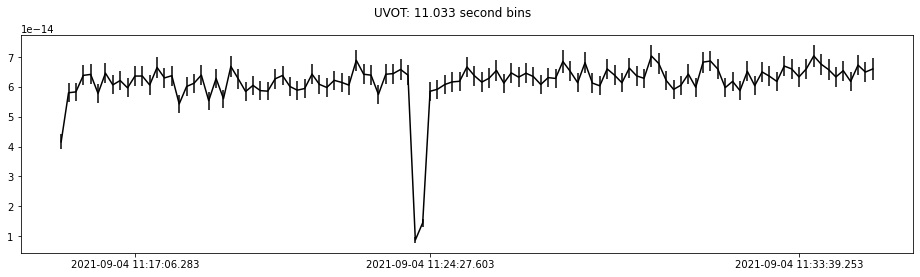

In [35]:
#XRT

lc20_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/020_curve_b.lc')

#time correction
xrt20=np.arange(lc20_data[1].header['TSTART'],lc20_data[1].header['TSTOP']-10,10)/86400
xlis20=[]
for i in xrt20: 
    x = i + lc20_data[0].header['MJDREFI']+lc20_data[0].header['MJDREFF']
    xlis20.append(x)
xrt20=np.array(xlis20)
xrt20c = Time(xlis20, format='mjd',scale = 'utc')
xrt20= xrt20c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt20,lc20_data[1].data['RATE'],xerr=None,yerr=lc20_data[1].data['ERROR'])
plt.xticks(ticks=(10,75,150))
plt.show()
pt20_time = xrt20
pt20_rate = lc20_data[1].data['RATE']


#UVOT

uvot20 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/020_evtlc.lc')
t=uvot20[1].data['TIME']/86400
lis20=[]
for i in t: 
    x = i + uvot20[0].header['MJDREFI']+uvot20[0].header['MJDREFF']
    lis20.append(x)
t20=np.array(lis20)
t20c = Time(lis20, format='mjd',scale = 'utc')
t20= t20c.iso

uv20_time= t20
uv20_rate= uvot20[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv20_time,uv20_rate,xerr=None,yerr=uvot20[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,50,100))

## Curve ID: 00014769021

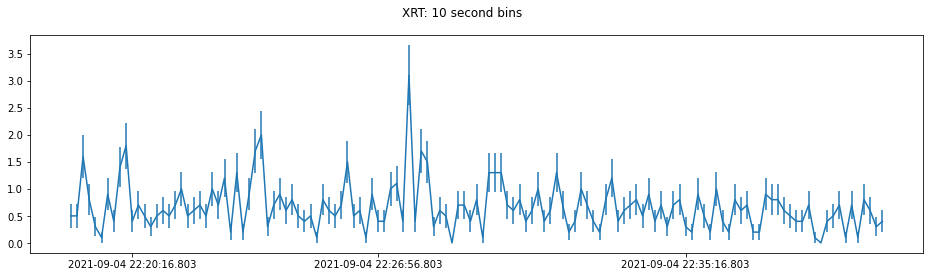

([<matplotlib.axis.XTick at 0x163527280>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

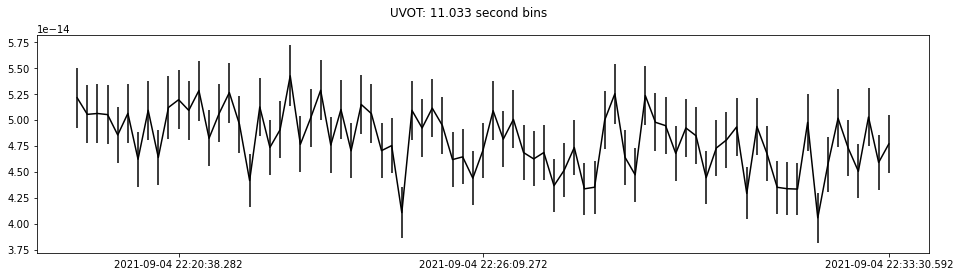

In [36]:
#XRT

lc21_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/021_curve_b.lc')

#time correction
xrt21=np.arange(lc21_data[1].header['TSTART'],lc21_data[1].header['TSTOP']-10,10)/86400
xlis21=[]
for i in xrt21: 
    x = i + lc21_data[0].header['MJDREFI']+lc21_data[0].header['MJDREFF']
    xlis21.append(x)
xrt21=np.array(xlis21)
xrt21c = Time(xlis21, format='mjd',scale = 'utc')
xrt21= xrt21c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt21,lc21_data[1].data['RATE'],xerr=None,yerr=lc21_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt21_time = xrt21
pt21_rate = lc21_data[1].data['RATE']


#UVOT

uvot21 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/021_evtlc.lc')
t=uvot21[1].data['TIME']/86400
lis21=[]
for i in t: 
    x = i + uvot21[0].header['MJDREFI']+uvot21[0].header['MJDREFF']
    lis21.append(x)
t21=np.array(lis21)
t21c = Time(lis21, format='mjd',scale = 'utc')
t21= t21c.iso

uv21_time= t21
uv21_rate= uvot21[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv21_time,uv21_rate,xerr=None,yerr=uvot21[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,40,80))

## Curve ID: 00014769022

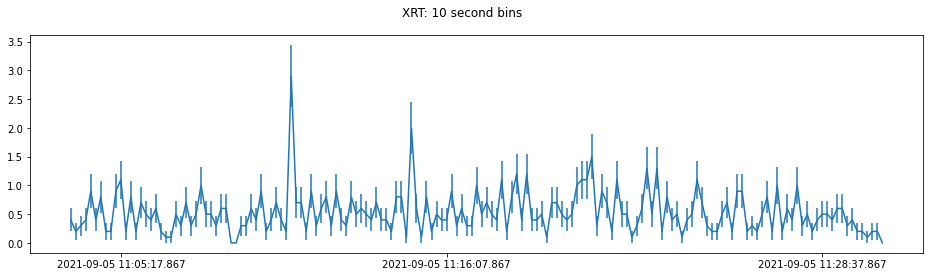

([<matplotlib.axis.XTick at 0x16377c700>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

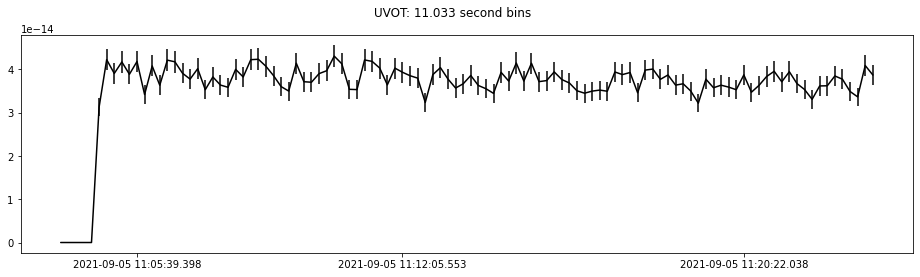

In [37]:
#XRT

lc22_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/022_curve_b.lc')

#time correction
xrt22=np.arange(lc22_data[1].header['TSTART'],lc22_data[1].header['TSTOP']-10,10)/86400
xlis22=[]
for i in xrt22: 
    x = i + lc22_data[0].header['MJDREFI']+lc22_data[0].header['MJDREFF']
    xlis22.append(x)
xrt22=np.array(xlis22)
xrt22c = Time(xlis22, format='mjd',scale = 'utc')
xrt22= xrt22c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt22,lc22_data[1].data['RATE'],xerr=None,yerr=lc22_data[1].data['ERROR'])
plt.xticks(ticks=(10,75,150))
plt.show()
pt22_time = xrt22
pt22_rate = lc22_data[1].data['RATE']

#UVOT

uvot22 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/022_evtlc.lc')
t=uvot22[1].data['TIME']/86400
lis22=[]
for i in t: 
    x = i + uvot22[0].header['MJDREFI']+uvot22[0].header['MJDREFF']
    lis22.append(x)
t22=np.array(lis22)
t22c = Time(lis22, format='mjd',scale = 'utc')
t22= t22c.iso

uv22_time= t22
uv22_rate= uvot22[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv22_time,uv22_rate,xerr=None,yerr=uvot22[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,45,90))

## Curve ID: 00014769023

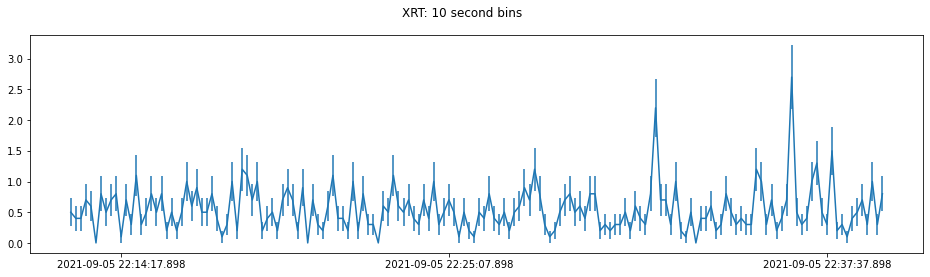

([<matplotlib.axis.XTick at 0x1639d6460>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

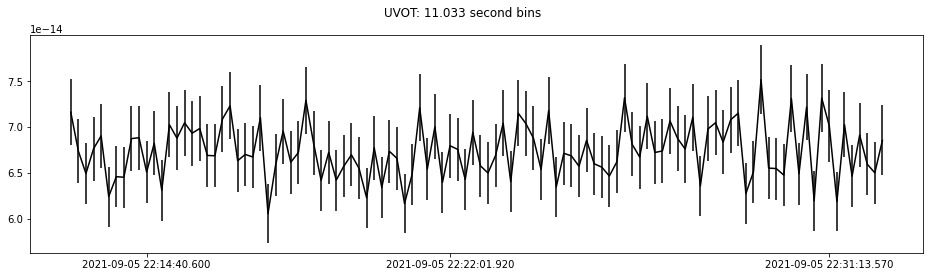

In [38]:
#XRT
lc23_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/023_curve_b.lc')

#time correction
xrt23=np.arange(lc23_data[1].header['TSTART'],lc23_data[1].header['TSTOP']-10,10)/86400
xlis23=[]
for i in xrt23: 
    x = i + lc23_data[0].header['MJDREFI']+lc23_data[0].header['MJDREFF']
    xlis23.append(x)
xrt23=np.array(xlis23)
xrt23c = Time(xlis23, format='mjd',scale = 'utc')
xrt23= xrt23c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt23,lc23_data[1].data['RATE'],xerr=None,yerr=lc23_data[1].data['ERROR'])
plt.xticks(ticks=(10,75,150))
plt.show()
pt23_time = xrt23
pt23_rate = lc23_data[1].data['RATE']


#UVOT

uvot23 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/023_evtlc.lc')
t=uvot23[1].data['TIME']/86400
lis23=[]
for i in t: 
    x = i + uvot23[0].header['MJDREFI']+uvot23[0].header['MJDREFF']
    lis23.append(x)
t23=np.array(lis23)
t23c = Time(lis23, format='mjd',scale = 'utc')
t23= t23c.iso

uv23_time= t23
uv23_rate= uvot23[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv23_time,uv23_rate,xerr=None,yerr=uvot23[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,50,100))

## Curve ID: 00014769024

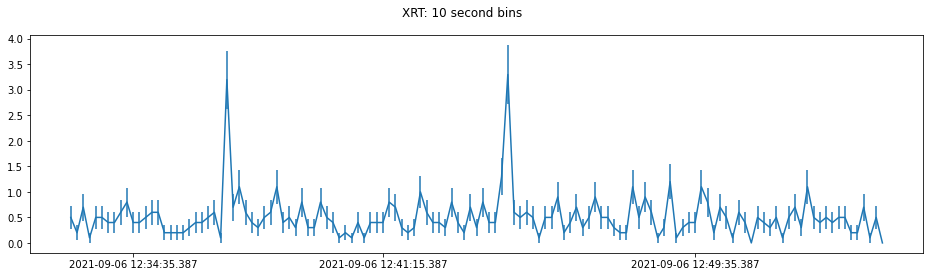

([<matplotlib.axis.XTick at 0x163b9ee20>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

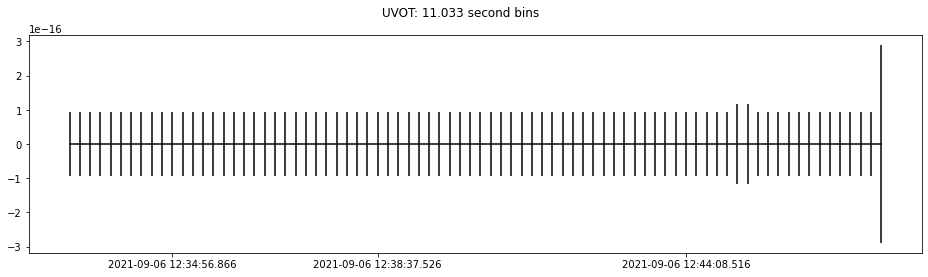

In [61]:
#XRT

lc24_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/024_curve_b.lc')

#time correction
xrt24=np.arange(lc24_data[1].header['TSTART'],lc24_data[1].header['TSTOP']-10,10)/86400
xlis24=[]
for i in xrt24: 
    x = i + lc24_data[0].header['MJDREFI']+lc24_data[0].header['MJDREFF']
    xlis24.append(x)
xrt24=np.array(xlis24)
xrt24c = Time(xlis24, format='mjd',scale = 'utc')
xrt24= xrt24c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt24,lc24_data[1].data['RATE'],xerr=None,yerr=lc24_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt24_time = xrt24
pt24_rate = lc24_data[1].data['RATE']


#UVOT

uvot24 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/024_evtlc.lc')
t=uvot24[1].data['TIME']/86400
lis24=[]
for i in t: 
    x = i + uvot24[0].header['MJDREFI']+uvot24[0].header['MJDREFF']
    lis24.append(x)
t24=np.array(lis24)
t24c = Time(lis24, format='mjd',scale = 'utc')
t24= t24c.iso

uv24_time= t24
uv24_rate= uvot24[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv24_time,uv24_rate,xerr=None,yerr=uvot24[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,30,60))

## Curve ID: 00014769025

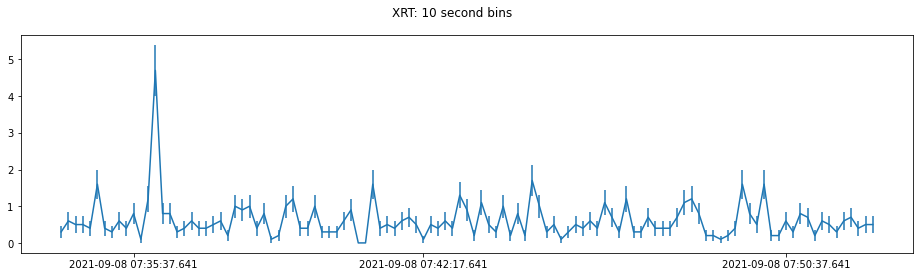

([<matplotlib.axis.XTick at 0x167f532b0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

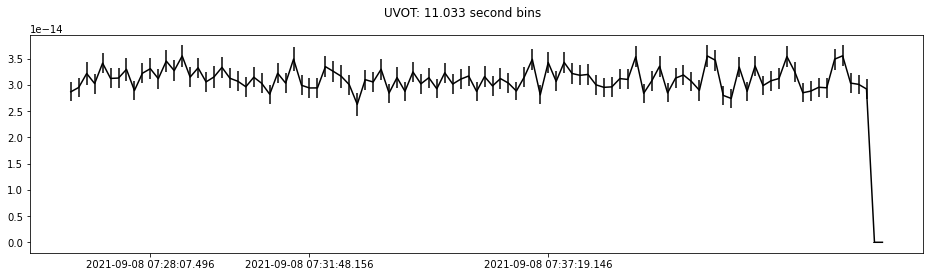

In [93]:
lc25_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/025_curve_b.lc')

#time correction
xrt25=np.arange(lc25_data[1].header['TSTART'],lc25_data[1].header['TSTOP']-10,10)/86400
xlis25=[]
for i in xrt25: 
    x = i + lc25_data[0].header['MJDREFI']+lc25_data[0].header['MJDREFF']
    xlis25.append(x)
xrt25=np.array(xlis25)
xrt25c = Time(xlis25, format='mjd',scale = 'utc')
xrt25= xrt25c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt25,lc25_data[1].data['RATE'],xerr=None,yerr=lc25_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt25_time = xrt25
pt25_rate = lc25_data[1].data['RATE']

#UVOT

uvot25 = fits.open('/Users/katborski/Documents/GitHub/uvotevtlc_curves/025_evtlc.lc')
t=uvot25[1].data['TIME']/86400
lis25=[]
for i in t: 
    x = i + uvot25[0].header['MJDREFI']+uvot25[0].header['MJDREFF']
    lis25.append(x)
t25=np.array(lis25)
t25c = Time(lis25, format='mjd',scale = 'utc')
t25= t25c.iso

uv25_time= t25
uv25_rate= uvot25[1].data['CORR_RATE']*8.446e-16
plt.figure(figsize=(16,4))
plt.suptitle("UVOT: 11.033 second bins")
plt.errorbar(uv25_time,uv25_rate,xerr=None,yerr=uvot25[1].data['CORR_RATE_ERR']*8.446e-16,color='black')
plt.xticks(ticks=(10,30,60))

## Curve ID: 00014769026

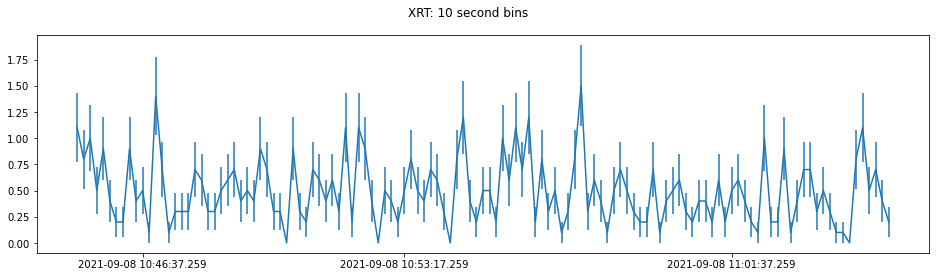

In [43]:
lc26_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/026_curve_b.lc')

#time correction
xrt26=np.arange(lc26_data[1].header['TSTART'],lc26_data[1].header['TSTOP']-10,10)/86400
xlis26=[]
for i in xrt26: 
    x = i + lc26_data[0].header['MJDREFI']+lc26_data[0].header['MJDREFF']
    xlis26.append(x)
xrt26=np.array(xlis26)
xrt26c = Time(xlis26, format='mjd',scale = 'utc')
xrt26= xrt26c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt26,lc26_data[1].data['RATE'],xerr=None,yerr=lc26_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt26_time = xrt26
pt26_rate = lc26_data[1].data['RATE']

## Curve ID: 00014769027

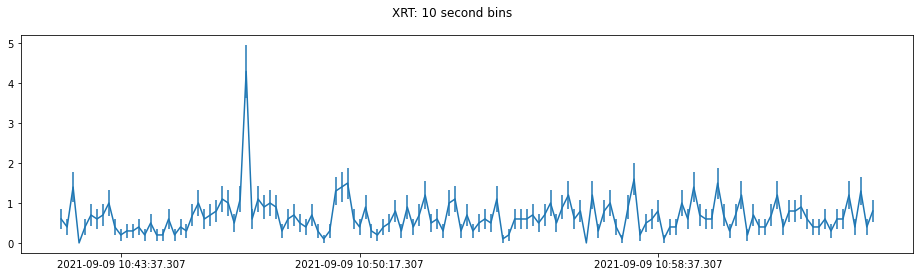

In [44]:
lc27_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/027_curve_b.lc')

#time correction
xrt27=np.arange(lc27_data[1].header['TSTART'],lc27_data[1].header['TSTOP']-10,10)/86400
xlis27=[]
for i in xrt27: 
    x = i + lc27_data[0].header['MJDREFI']+lc27_data[0].header['MJDREFF']
    xlis27.append(x)
xrt27=np.array(xlis27)
xrt27c = Time(xlis27, format='mjd',scale = 'utc')
xrt27= xrt27c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt27,lc27_data[1].data['RATE'],xerr=None,yerr=lc27_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt27_time = xrt27
pt27_rate = lc27_data[1].data['RATE']

## Curve ID: 00014769028

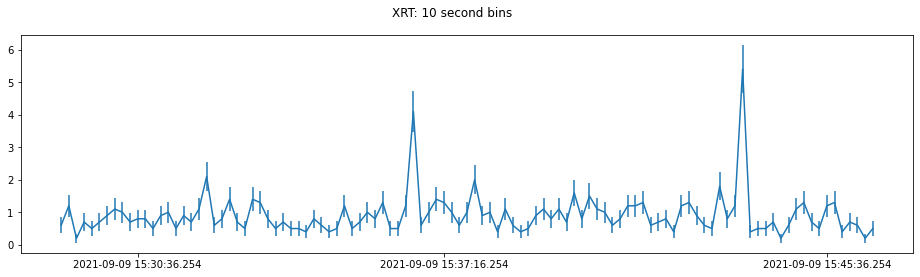

In [46]:
lc28_data = fits.open('/Users/katborski/Documents/GitHub/xrt-10sec/028_curve_b.lc')

#time correction
xrt28=np.arange(lc28_data[1].header['TSTART'],lc28_data[1].header['TSTOP']-10,10)/86400
xlis28=[]
for i in xrt28: 
    x = i + lc28_data[0].header['MJDREFI']+lc28_data[0].header['MJDREFF']
    xlis28.append(x)
xrt28=np.array(xlis28)
xrt28c = Time(xlis28, format='mjd',scale = 'utc')
xrt28= xrt28c.iso

#plot
plt.figure(figsize=(16,4))
plt.suptitle("XRT: 10 second bins")
plt.errorbar(xrt28,lc28_data[1].data['RATE'],xerr=None,yerr=lc28_data[1].data['ERROR'])
plt.xticks(ticks=(10,50,100))
plt.show()
pt28_time = xrt28
pt28_rate = lc28_data[1].data['RATE']

In [62]:
xrt_rate=[]
xrt_rate.append(pt1_rate)
xrt_rate.append(pt2_rate)
xrt_rate.append(pt3_rate)
xrt_rate.append(pt4_rate)
xrt_rate.append(pt5_rate)
xrt_rate.append(pt6_rate)
xrt_rate.append(pt7_rate)
xrt_rate.append(pt8_rate)
xrt_rate.append(pt9_rate)
xrt_rate.append(pt10_rate)
xrt_rate.append(pt11_rate)
xrt_rate.append(pt12_rate)
xrt_rate.append(pt13_rate)
xrt_rate.append(pt14_rate)
xrt_rate.append(pt15_rate)
xrt_rate.append(pt16_rate)
xrt_rate.append(pt17_rate)
xrt_rate.append(pt18_rate)
xrt_rate.append(pt19_rate)
xrt_rate.append(pt20_rate)
xrt_rate.append(pt21_rate)
xrt_rate.append(pt22_rate)
xrt_rate.append(pt23_rate)
xrt_rate.append(pt24_rate)
xrt_rate.append(pt25_rate)
xrt_rate.append(pt26_rate)
xrt_rate.append(pt27_rate)
xrt_rate.append(pt28_rate)


uvot_rate=[]
uvot_rate.append(uvot1[1].data['CORR_RATE'])
uvot_rate.append(uvot2[1].data['CORR_RATE'])
uvot_rate.append(uvot4[1].data['CORR_RATE'])
uvot_rate.append(uvot5[1].data['CORR_RATE'])
uvot_rate.append(uvot6[1].data['CORR_RATE'])
uvot_rate.append(uvot7[1].data['CORR_RATE'])
uvot_rate.append(uvot8[1].data['CORR_RATE'])
uvot_rate.append(uvot9[1].data['CORR_RATE'])
uvot_rate.append(uvot10[1].data['CORR_RATE'])
uvot_rate.append(uvot11[1].data['CORR_RATE'])
uvot_rate.append(uvot12[1].data['CORR_RATE'])
uvot_rate.append(uvot13[1].data['CORR_RATE'])
uvot_rate.append(uvot14[1].data['CORR_RATE'])
uvot_rate.append(uvot15[1].data['CORR_RATE'])
uvot_rate.append(uvot16[1].data['CORR_RATE'])
uvot_rate.append(uvot17[1].data['CORR_RATE'])
uvot_rate.append(uvot18[1].data['CORR_RATE'])
uvot_rate.append(uvot19[1].data['CORR_RATE'])
uvot_rate.append(uvot20[1].data['CORR_RATE'])
uvot_rate.append(uvot21[1].data['CORR_RATE'])
uvot_rate.append(uvot22[1].data['CORR_RATE'])
uvot_rate.append(uvot23[1].data['CORR_RATE'])
uvot_rate.append(uvot24[1].data['CORR_RATE'])

uvot_time=[]
uvot_time.append(uv1_time)
uvot_time.append(uv2_time)
uvot_time.append(uv4_time)
uvot_time.append(uv5_time)
uvot_time.append(uv6_time)
uvot_time.append(uv7_time)
uvot_time.append(uv8_time)
uvot_time.append(uv9_time)
uvot_time.append(uv10_time)
uvot_time.append(uv11_time)
uvot_time.append(uv12_time)
uvot_time.append(uv13_time)
uvot_time.append(uv14_time)
uvot_time.append(uv15_time)
uvot_time.append(uv16_time)
uvot_time.append(uv17_time)
uvot_time.append(uv18_time)
uvot_time.append(uv19_time)
uvot_time.append(uv20_time)
uvot_time.append(uv21_time)
uvot_time.append(uv22_time)
uvot_time.append(uv23_time)
uvot_time.append(uv24_time)

In [63]:
rates = np.concatenate(xrt_rate)
urates = np.concatenate(uvot_rate)
utime = np.concatenate(uvot_time)

Text(0.5, 0, 'Time')

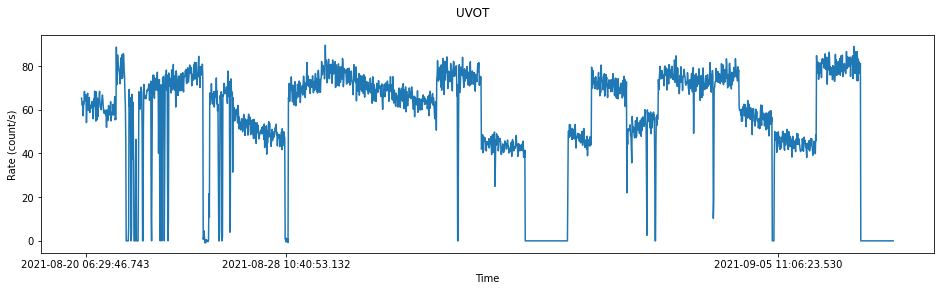

In [64]:
plt.figure(figsize=(16,4))
plt.suptitle("UVOT")
plt.plot(utime,urates)
plt.xticks(ticks=(10,500,1700))
plt.ylabel(ylabel=('Rate (count/s)'))
plt.xlabel(xlabel=('Time'))
#why slant :(

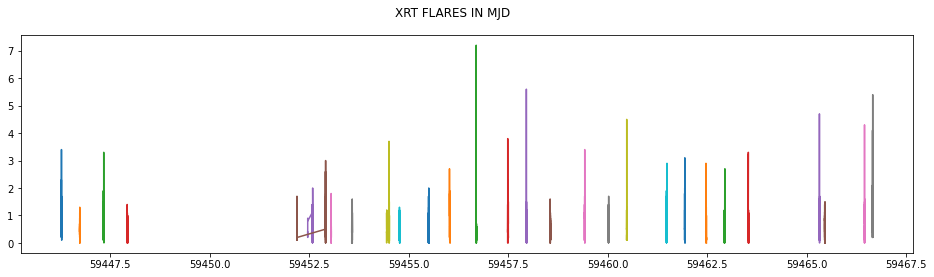

In [95]:
plt.figure(figsize=(16,4))
plt.suptitle('XRT FLARES IN MJD')
plt.plot(((lc_data[1].data['TIME']/86400)+lc_data[0].header['MJDREFI']+lc_data[0].header['MJDREFF']),pt1_rate)
plt.plot(((lc2_data[1].data['TIME']/86400)+lc2_data[0].header['MJDREFI']+lc2_data[0].header['MJDREFF']),pt2_rate)
plt.plot(((lc3_data[1].data['TIME']/86400)+lc3_data[0].header['MJDREFI']+lc3_data[0].header['MJDREFF']),pt3_rate)
plt.plot(((lc4_data[1].data['TIME']/86400)+lc4_data[0].header['MJDREFI']+lc4_data[0].header['MJDREFF']),pt4_rate)
plt.plot(((lc5_data[1].data['TIME']/86400)+lc5_data[0].header['MJDREFI']+lc5_data[0].header['MJDREFF']),pt5_rate)
plt.plot(((lc6_data[1].data['TIME']/86400)+lc6_data[0].header['MJDREFI']+lc6_data[0].header['MJDREFF']),pt6_rate)
plt.plot(((lc7_data[1].data['TIME']/86400)+lc7_data[0].header['MJDREFI']+lc7_data[0].header['MJDREFF']),pt7_rate)
plt.plot(((lc8_data[1].data['TIME']/86400)+lc8_data[0].header['MJDREFI']+lc8_data[0].header['MJDREFF']),pt8_rate)
plt.plot(((lc9_data[1].data['TIME']/86400)+lc9_data[0].header['MJDREFI']+lc9_data[0].header['MJDREFF']),pt9_rate)
plt.plot(((lc10_data[1].data['TIME']/86400)+lc10_data[0].header['MJDREFI']+lc10_data[0].header['MJDREFF']),pt10_rate)
plt.plot(((lc11_data[1].data['TIME']/86400)+lc11_data[0].header['MJDREFI']+lc11_data[0].header['MJDREFF']),pt11_rate)
plt.plot(((lc12_data[1].data['TIME']/86400)+lc12_data[0].header['MJDREFI']+lc12_data[0].header['MJDREFF']),pt12_rate)
plt.plot(((lc13_data[1].data['TIME']/86400)+lc13_data[0].header['MJDREFI']+lc13_data[0].header['MJDREFF']),pt13_rate)
plt.plot(((lc14_data[1].data['TIME']/86400)+lc14_data[0].header['MJDREFI']+lc14_data[0].header['MJDREFF']),pt14_rate)
plt.plot(((lc15_data[1].data['TIME']/86400)+lc15_data[0].header['MJDREFI']+lc15_data[0].header['MJDREFF']),pt15_rate)
plt.plot(((lc16_data[1].data['TIME']/86400)+lc16_data[0].header['MJDREFI']+lc16_data[0].header['MJDREFF']),pt16_rate)
plt.plot(((lc17_data[1].data['TIME']/86400)+lc17_data[0].header['MJDREFI']+lc17_data[0].header['MJDREFF']),pt17_rate)
plt.plot(((lc18_data[1].data['TIME']/86400)+lc18_data[0].header['MJDREFI']+lc18_data[0].header['MJDREFF']),pt18_rate)
plt.plot(((lc19_data[1].data['TIME']/86400)+lc19_data[0].header['MJDREFI']+lc19_data[0].header['MJDREFF']),pt19_rate)
plt.plot(((lc20_data[1].data['TIME']/86400)+lc20_data[0].header['MJDREFI']+lc20_data[0].header['MJDREFF']),pt20_rate)
plt.plot(((lc21_data[1].data['TIME']/86400)+lc21_data[0].header['MJDREFI']+lc21_data[0].header['MJDREFF']),pt21_rate)
plt.plot(((lc22_data[1].data['TIME']/86400)+lc22_data[0].header['MJDREFI']+lc22_data[0].header['MJDREFF']),pt22_rate)
plt.plot(((lc23_data[1].data['TIME']/86400)+lc23_data[0].header['MJDREFI']+lc23_data[0].header['MJDREFF']),pt23_rate)
plt.plot(((lc24_data[1].data['TIME']/86400)+lc24_data[0].header['MJDREFI']+lc24_data[0].header['MJDREFF']),pt24_rate)
plt.plot(((lc25_data[1].data['TIME']/86400)+lc25_data[0].header['MJDREFI']+lc25_data[0].header['MJDREFF']),pt25_rate)
plt.plot(((lc26_data[1].data['TIME']/86400)+lc26_data[0].header['MJDREFI']+lc26_data[0].header['MJDREFF']),pt26_rate)
plt.plot(((lc27_data[1].data['TIME']/86400)+lc27_data[0].header['MJDREFI']+lc27_data[0].header['MJDREFF']),pt27_rate)
plt.plot(((lc28_data[1].data['TIME']/86400)+lc28_data[0].header['MJDREFI']+lc28_data[0].header['MJDREFF']),pt28_rate)

In [66]:
uvottime=Time(utime,format='iso',scale='utc')

In [67]:
uvottime.mjd

array([59446.26940293, 59446.26953063, 59446.26965832, ...,
       59463.53282497, 59463.53295266, 59463.53308036])

In [68]:
swiftXtime=[]
swiftXtime.append((lc_data[1].data['TIME']/86400)+lc_data[0].header['MJDREFI']+lc_data[0].header['MJDREFF'])
swiftXtime.append((lc2_data[1].data['TIME']/86400)+lc2_data[0].header['MJDREFI']+lc2_data[0].header['MJDREFF'])
swiftXtime.append((lc3_data[1].data['TIME']/86400)+lc3_data[0].header['MJDREFI']+lc3_data[0].header['MJDREFF'])
swiftXtime.append((lc4_data[1].data['TIME']/86400)+lc4_data[0].header['MJDREFI']+lc4_data[0].header['MJDREFF'])
swiftXtime.append((lc5_data[1].data['TIME']/86400)+lc5_data[0].header['MJDREFI']+lc5_data[0].header['MJDREFF'])
swiftXtime.append((lc6_data[1].data['TIME']/86400)+lc6_data[0].header['MJDREFI']+lc6_data[0].header['MJDREFF'])
swiftXtime.append((lc7_data[1].data['TIME']/86400)+lc7_data[0].header['MJDREFI']+lc7_data[0].header['MJDREFF'])
swiftXtime.append((lc8_data[1].data['TIME']/86400)+lc8_data[0].header['MJDREFI']+lc8_data[0].header['MJDREFF'])
swiftXtime.append((lc9_data[1].data['TIME']/86400)+lc9_data[0].header['MJDREFI']+lc9_data[0].header['MJDREFF'])
swiftXtime.append((lc10_data[1].data['TIME']/86400)+lc10_data[0].header['MJDREFI']+lc10_data[0].header['MJDREFF'])
swiftXtime.append((lc11_data[1].data['TIME']/86400)+lc11_data[0].header['MJDREFI']+lc11_data[0].header['MJDREFF'])
swiftXtime.append((lc12_data[1].data['TIME']/86400)+lc12_data[0].header['MJDREFI']+lc12_data[0].header['MJDREFF'])
swiftXtime.append((lc13_data[1].data['TIME']/86400)+lc13_data[0].header['MJDREFI']+lc13_data[0].header['MJDREFF'])
swiftXtime.append((lc14_data[1].data['TIME']/86400)+lc14_data[0].header['MJDREFI']+lc14_data[0].header['MJDREFF'])
swiftXtime.append((lc15_data[1].data['TIME']/86400)+lc15_data[0].header['MJDREFI']+lc15_data[0].header['MJDREFF'])
swiftXtime.append((lc16_data[1].data['TIME']/86400)+lc16_data[0].header['MJDREFI']+lc16_data[0].header['MJDREFF'])
swiftXtime.append((lc17_data[1].data['TIME']/86400)+lc17_data[0].header['MJDREFI']+lc17_data[0].header['MJDREFF'])
swiftXtime.append((lc18_data[1].data['TIME']/86400)+lc18_data[0].header['MJDREFI']+lc18_data[0].header['MJDREFF'])
swiftXtime.append((lc19_data[1].data['TIME']/86400)+lc19_data[0].header['MJDREFI']+lc19_data[0].header['MJDREFF'])
swiftXtime.append((lc20_data[1].data['TIME']/86400)+lc20_data[0].header['MJDREFI']+lc20_data[0].header['MJDREFF'])
swiftXtime.append((lc21_data[1].data['TIME']/86400)+lc21_data[0].header['MJDREFI']+lc21_data[0].header['MJDREFF'])
swiftXtime.append((lc22_data[1].data['TIME']/86400)+lc22_data[0].header['MJDREFI']+lc22_data[0].header['MJDREFF'])
swiftXtime.append((lc23_data[1].data['TIME']/86400)+lc23_data[0].header['MJDREFI']+lc23_data[0].header['MJDREFF'])
swiftXtime.append((lc24_data[1].data['TIME']/86400)+lc24_data[0].header['MJDREFI']+lc24_data[0].header['MJDREFF'])
swiftXtime.append((lc25_data[1].data['TIME']/86400)+lc25_data[0].header['MJDREFI']+lc25_data[0].header['MJDREFF'])
swiftXtime.append((lc26_data[1].data['TIME']/86400)+lc26_data[0].header['MJDREFI']+lc26_data[0].header['MJDREFF'])
swiftXtime.append((lc27_data[1].data['TIME']/86400)+lc27_data[0].header['MJDREFI']+lc27_data[0].header['MJDREFF'])
swiftXtime.append((lc28_data[1].data['TIME']/86400)+lc28_data[0].header['MJDREFI']+lc28_data[0].header['MJDREFF'])

In [69]:
Swifttime = np.concatenate(swiftXtime)
XRTtime=Time(Swifttime,format='mjd',scale='utc')
print(tesstime.mjd)
print(XRTtime)

[59447.19578054 59447.19601203 59447.19624352 ... 59470.33605715
 59470.33628863 59470.33652011]
[59446.26932403 59446.26943978 59446.26955553 ... 59466.65719064
 59466.65730638 59466.65742212]


In [70]:
type(tesstime)

astropy.time.core.Time

In [71]:
xrt = pd.DataFrame({
                    'Time':XRTtime.mjd,
                    'Count/s':rates
})
tess = pd.DataFrame({
                    'Time':tesstime.mjd,
                    'Flux':flux
})

In [72]:
xrt

,Time,Count/s
0,59446.269324,0.3
1,59446.269440,1.2
2,59446.269556,0.4
3,59446.269671,0.8
4,59446.269787,0.3
...,...,...
3878,59466.656959,0.4
3879,59466.657075,0.7
3880,59466.657191,0.6
3881,59466.657306,0.2


In [73]:
tess

,Time,Flux
0,59447.195781,4178.156738
1,59447.196012,4193.419922
2,59447.196244,4184.613281
3,59447.196475,4195.867188
4,59447.196707,4174.927246
...,...,...
66879,59470.335594,4173.302246
66880,59470.335826,4175.595215
66881,59470.336057,4188.241699
66882,59470.336289,4175.395996


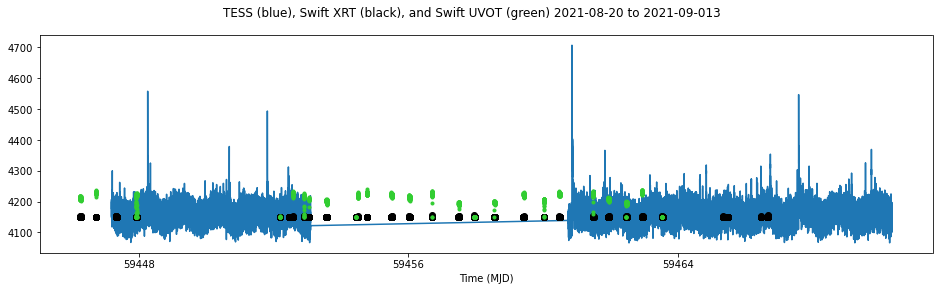

In [74]:
#Swift data covers 2021-08-20 (59446.3 mjd) to 2021-09-09 (59467 mjd), 
#Swift data gap between 2021-08-21 (59447.9 mjd) and 2021-08-26 (59452.5 mjd)


#TESS data covers 2021-08-21 (59447.2 mjd) to 2021-09-13 (59470.3 mjd), 
#TESS data gap 2021-08-27 (59453.1 mjd) to 2021-09-03 (59460.7 mjd)
time_support()

plt.figure(figsize=(16,4))
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates)+4150,color='black',zorder=5,marker='o')
plt.suptitle('TESS (blue), Swift XRT (black), and Swift UVOT (green) 2021-08-20 to 2021-09-013')
plt.xlabel('Time (MJD)')
#plt.ylabel('TESS Flux (blue, e/s), XRT Rate (black, count/s), UVOT Rate (green, count/s)')
plt.savefig('TESS_XRT_UVOT_scatter.png',dpi=500)

Text(0.5, 0.98, 'TESS (blue) & Swift XRT (black) between 2021-08-20 & 2021-08-27')

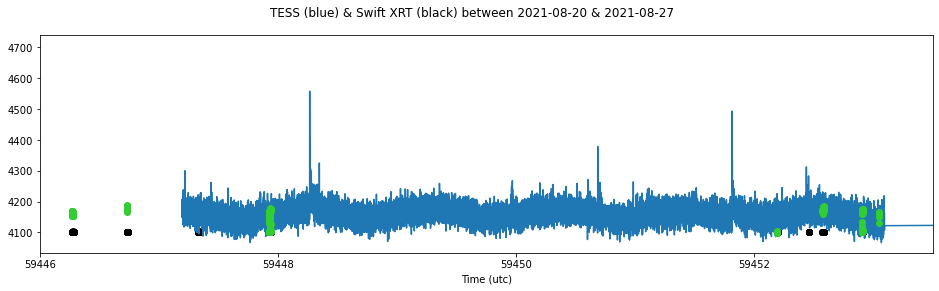

In [75]:
plt.figure(figsize=(16,4))
plt.xlim(59446,59453.5)
plt.plot(tesstime.mjd,flux)
plt.scatter(XRTtime,(rates)+4100,color='black')
plt.scatter(uvottime.mjd,(urates)+4100,color='limegreen',zorder=10)
plt.suptitle('TESS (blue) & Swift XRT (black) between 2021-08-20 & 2021-08-27')


Text(0.5, 0.98, 'TESS (blue) & Swift XRT (black) between 2021-08-27 & 2021-09-04')

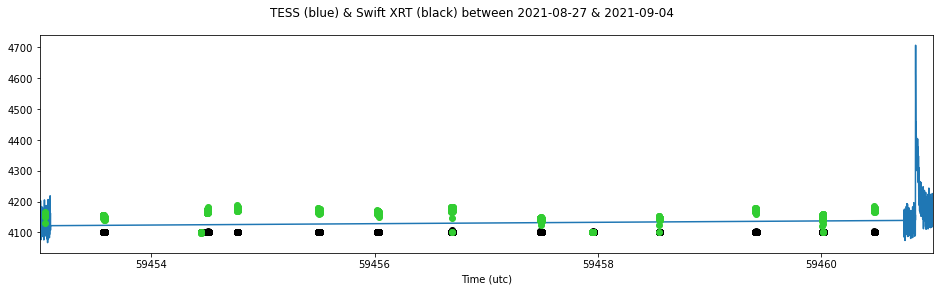

In [76]:
plt.figure(figsize=(16,4))
plt.xlim(59453,59461)
plt.plot(tesstime.mjd,flux)
plt.scatter(XRTtime,(rates)+4100,color='black')
plt.scatter(uvottime.mjd,(urates)+4100,color='limegreen',zorder=10)
plt.suptitle('TESS (blue) & Swift XRT (black) between 2021-08-27 & 2021-09-04')

Text(0.5, 0.98, 'TESS (blue), Swift XRT (black), Swift UVOT (green) 2021-09-04 & 2021-09-13')

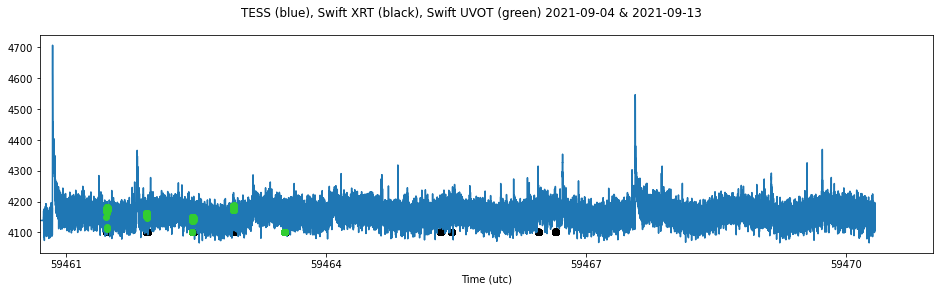

In [77]:
plt.figure(figsize=(16,4))
plt.xlim(59460.7,59471)
plt.plot(tesstime,flux)
plt.scatter(XRTtime,(rates)+4100,color='black')
plt.scatter(uvottime.mjd,(urates)+4100,color='limegreen',zorder=10)
plt.suptitle('TESS (blue), Swift XRT (black), Swift UVOT (green) 2021-09-04 & 2021-09-13')

Text(0.5, 0.98, 'Visit 4')

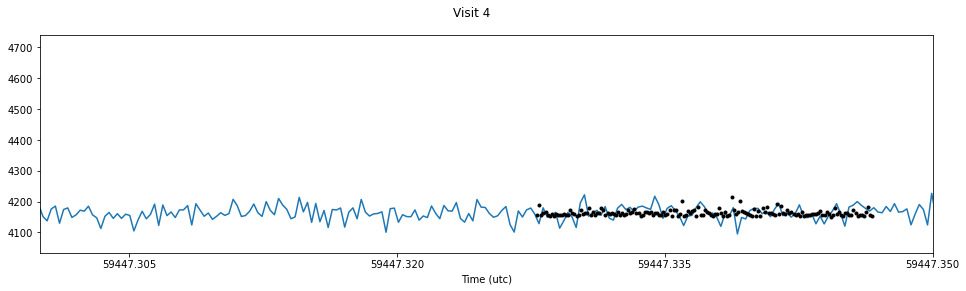

In [78]:
plt.figure(figsize=(16,4))
plt.xlim(59447.3,59447.35)
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates*20)+4150,color='black',zorder=5,marker='.')
plt.suptitle('Visit 4')

Text(0.5, 0.98, 'Visit 5')

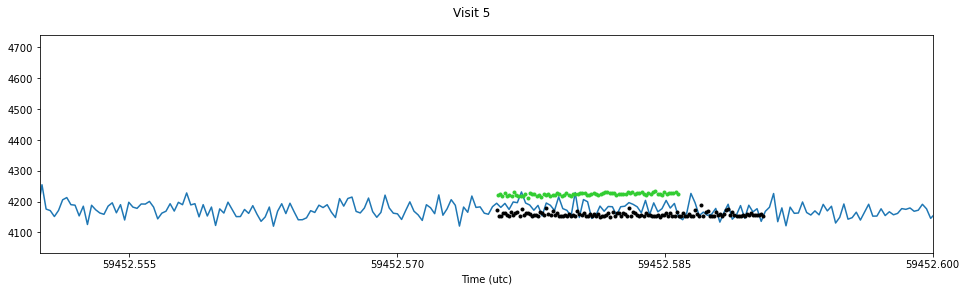

In [79]:
plt.figure(figsize=(16,4))
plt.xlim(59452.55,59452.6)
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates*20)+4150,color='black',zorder=5,marker='.')
plt.suptitle('Visit 5')

Text(0.5, 0.98, 'Visit 6 (spotty coverage)')

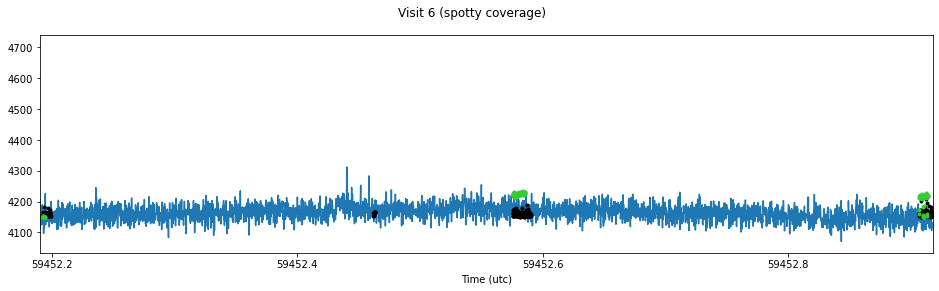

In [80]:
plt.figure(figsize=(16,4))
plt.xlim(59452.19,59452.918)
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates*20)+4150,color='black',zorder=5,marker='.')
plt.suptitle('Visit 6 (spotty coverage)')

Text(0.5, 0.98, 'Visit 7')

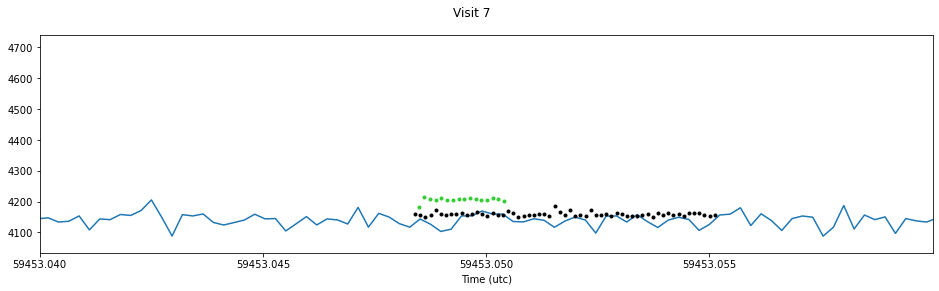

In [81]:
plt.figure(figsize=(16,4))
plt.xlim(59453.04,59453.06)
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates*20)+4150,color='black',zorder=5,marker='.')
plt.suptitle('Visit 7')

Text(0.5, 0.98, 'Visit 20')

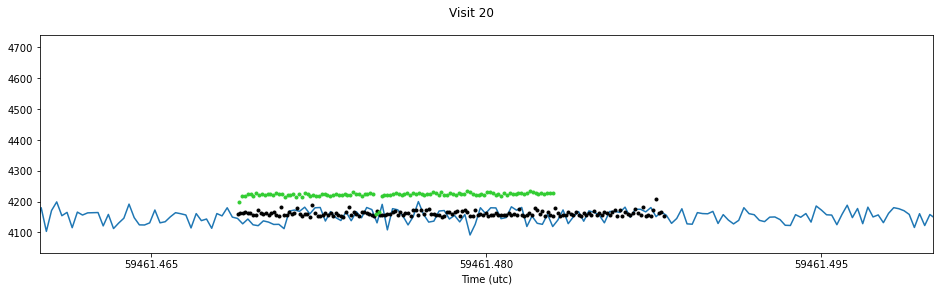

In [82]:
plt.figure(figsize=(16,4))
plt.xlim(59461.46,59461.5)
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates*20)+4150,color='black',zorder=5,marker='.')
plt.suptitle('Visit 20')

Text(0.5, 0.98, 'Visit 21')

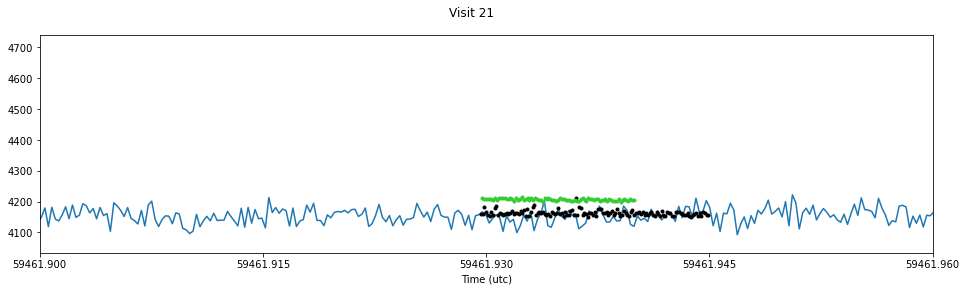

In [83]:
plt.figure(figsize=(16,4))
plt.xlim(59461.9,59461.96)
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates*20)+4150,color='black',zorder=5,marker='.')
plt.suptitle('Visit 21')

Text(0.5, 0.98, 'Visit 21')

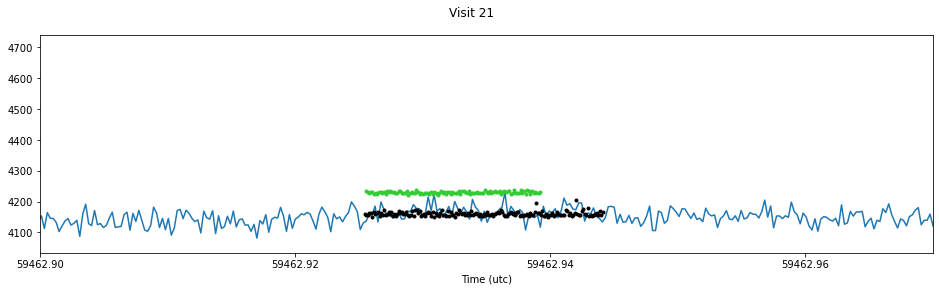

In [98]:
plt.figure(figsize=(16,4))
plt.xlim(59462.9,59462.97)
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates*20)+4150,color='black',zorder=5,marker='.')
plt.suptitle('Visit 21')

Text(0.5, 0.98, 'Visit 23')

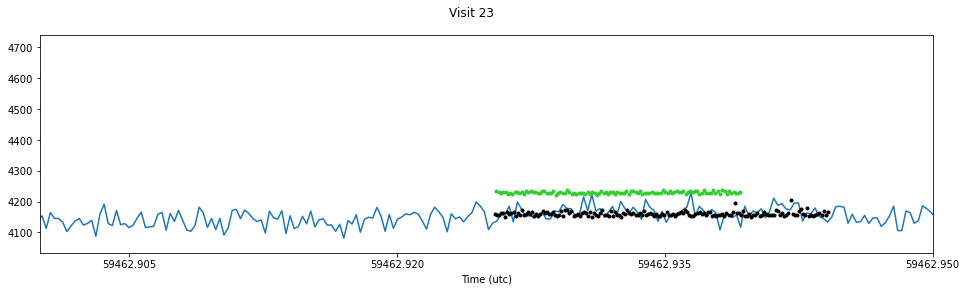

In [85]:
plt.figure(figsize=(16,4))
plt.xlim(59462.9,59462.95)
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates*20)+4150,color='black',zorder=5,marker='.')
plt.suptitle('Visit 23')

Text(0.5, 0.98, 'Visit 24')

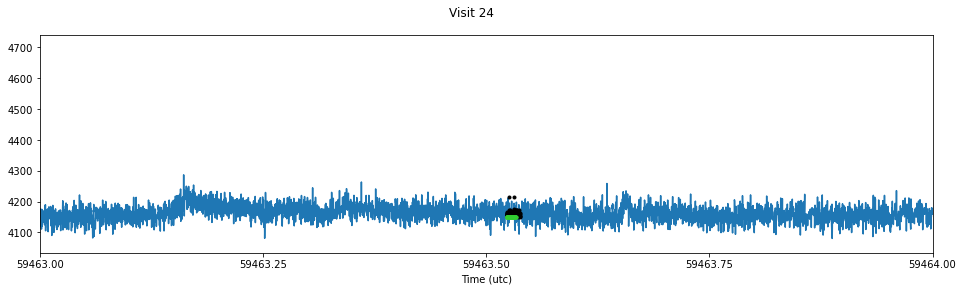

In [86]:
plt.figure(figsize=(16,4))
plt.xlim(59463,59464)
plt.plot(tesstime.mjd,flux)
plt.scatter(uvottime.mjd,(urates)+4150,color='limegreen',zorder=10, marker='.')
plt.scatter(XRTtime,(rates*20)+4150,color='black',zorder=5,marker='.')
plt.suptitle('Visit 24')

In [87]:
(lc24_data[1].data['TIME']/86400)+lc24_data[0].header['MJDREFI']+lc24_data[0].header['MJDREFF']

array([59463.52292115, 59463.52303689, 59463.52315264, 59463.52326838,
       59463.52338413, 59463.52349987, 59463.52361562, 59463.52373136,
       59463.52384711, 59463.52396285, 59463.5240786 , 59463.52419434,
       59463.52431009, 59463.52442583, 59463.52454158, 59463.52465732,
       59463.52477307, 59463.52488881, 59463.52500455, 59463.5251203 ,
       59463.52523604, 59463.52535179, 59463.52546753, 59463.52558328,
       59463.52569902, 59463.52581477, 59463.52593051, 59463.52604626,
       59463.526162  , 59463.52627775, 59463.52639349, 59463.52650923,
       59463.52662498, 59463.52674072, 59463.52685647, 59463.52697221,
       59463.52708796, 59463.5272037 , 59463.52731945, 59463.52743519,
       59463.52755093, 59463.52766668, 59463.52778242, 59463.52789817,
       59463.52801391, 59463.52812966, 59463.5282454 , 59463.52836114,
       59463.52847689, 59463.52859263, 59463.52870838, 59463.52882412,
       59463.52893986, 59463.52905561, 59463.52917135, 59463.5292871 ,
      

In [91]:
hdulist[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =               110055 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2457000, days' / column units: Barycenter corrected TESS Julian
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

array([0.6, 1.2, 0.2, 0.7, 0.5, 0.7, 0.9, 1.1, 1. , 0.7, 0.8, 0.8, 0.5,
       0.9, 1. , 0.5, 0.9, 0.7, 1.1, 2.1, 0.6, 0.8, 1.4, 0.7, 0.5, 1.4,
       1.3, 0.8, 0.5, 0.7, 0.5, 0.5, 0.4, 0.8, 0.6, 0.4, 0.5, 1.2, 0.5,
       0.7, 1. , 0.8, 1.3, 0.5, 0.5, 1.2, 4.1, 0.6, 1. , 1.4, 1.3, 1. ,
       0.6, 1. , 2. , 0.9, 1. , 0.4, 1.1, 0.6, 0.4, 0.5, 0.9, 1.1, 0.8,
       1.1, 0.7, 1.6, 0.8, 1.5, 1.1, 1. , 0.6, 0.8, 1.2, 1.2, 1.3, 0.6,
       0.7, 0.8, 0.4, 1.2, 1.3, 0.9, 0.6, 0.5, 1.8, 0.8, 1.2, 5.4, 0.4,
       0.5, 0.5, 0.7, 0.2, 0.6, 1.1, 1.3, 0.7, 0.5, 1.2, 1.3, 0.4, 0.7,
       0.6, 0.2, 0.5], dtype=float32)